In [80]:
import pandas as pd

In [81]:
import warnings
warnings.filterwarnings(action='ignore')

In [82]:
import matplotlib.pyplot as plt

In [83]:
import seaborn as sns

In [84]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 17
plt.rcParams['axes.unicode_minus']=False  

In [85]:
data=pd.read_csv("주민등록인구_20230428154200.csv")

In [86]:
seoul_2020_p=data[['동별(2)','2020 4/4']].sort_values(by='2020 4/4', ascending=False)
seoul_2020_p.columns=['구별','인구수']
seoul_2020_p.reset_index(drop=True, inplace=True)
seoul_2020_p.rename(columns={'인구수':'인구수20'},inplace=True)
seoul_2020_p=seoul_2020_p.set_index('구별')

In [87]:
seoul_2021_p=data[['동별(2)','2021 4/4']].sort_values(by='2021 4/4', ascending=False)
seoul_2021_p.columns=['구별','인구수']
seoul_2021_p.reset_index(drop=True, inplace=True)
seoul_2021_p.rename(columns={'인구수':'인구수21'},inplace=True)
seoul_2021_p=seoul_2021_p.set_index('구별')

In [88]:
seoul_p=pd.concat([seoul_2020_p,seoul_2021_p],axis=1,join='inner')

In [89]:
seoul_p

인구수20   인구수21
구별                  
송파구   673926  663965
강서구   585901  579768
강남구   544055  537800
노원구   527032  514946
관악구   509803  499449
은평구   484043  477173
강동구   463998  466472
양천구   457781  450487
성북구   447056  440142
구로구   432488  421163
서초구   429025  416167
영등포구  407367  400908
동작구   401572  394364
중랑구   399562  391885
마포구   381858  378686
광진구   360109  352627
동대문구  357014  352006
도봉구   327361  319373
서대문구  322952  315659
강북구   311569  302563
성동구   300505  292672
금천구   247835  244891
용산구   244645  237285
종로구   158996  153789
중구    134635  131787

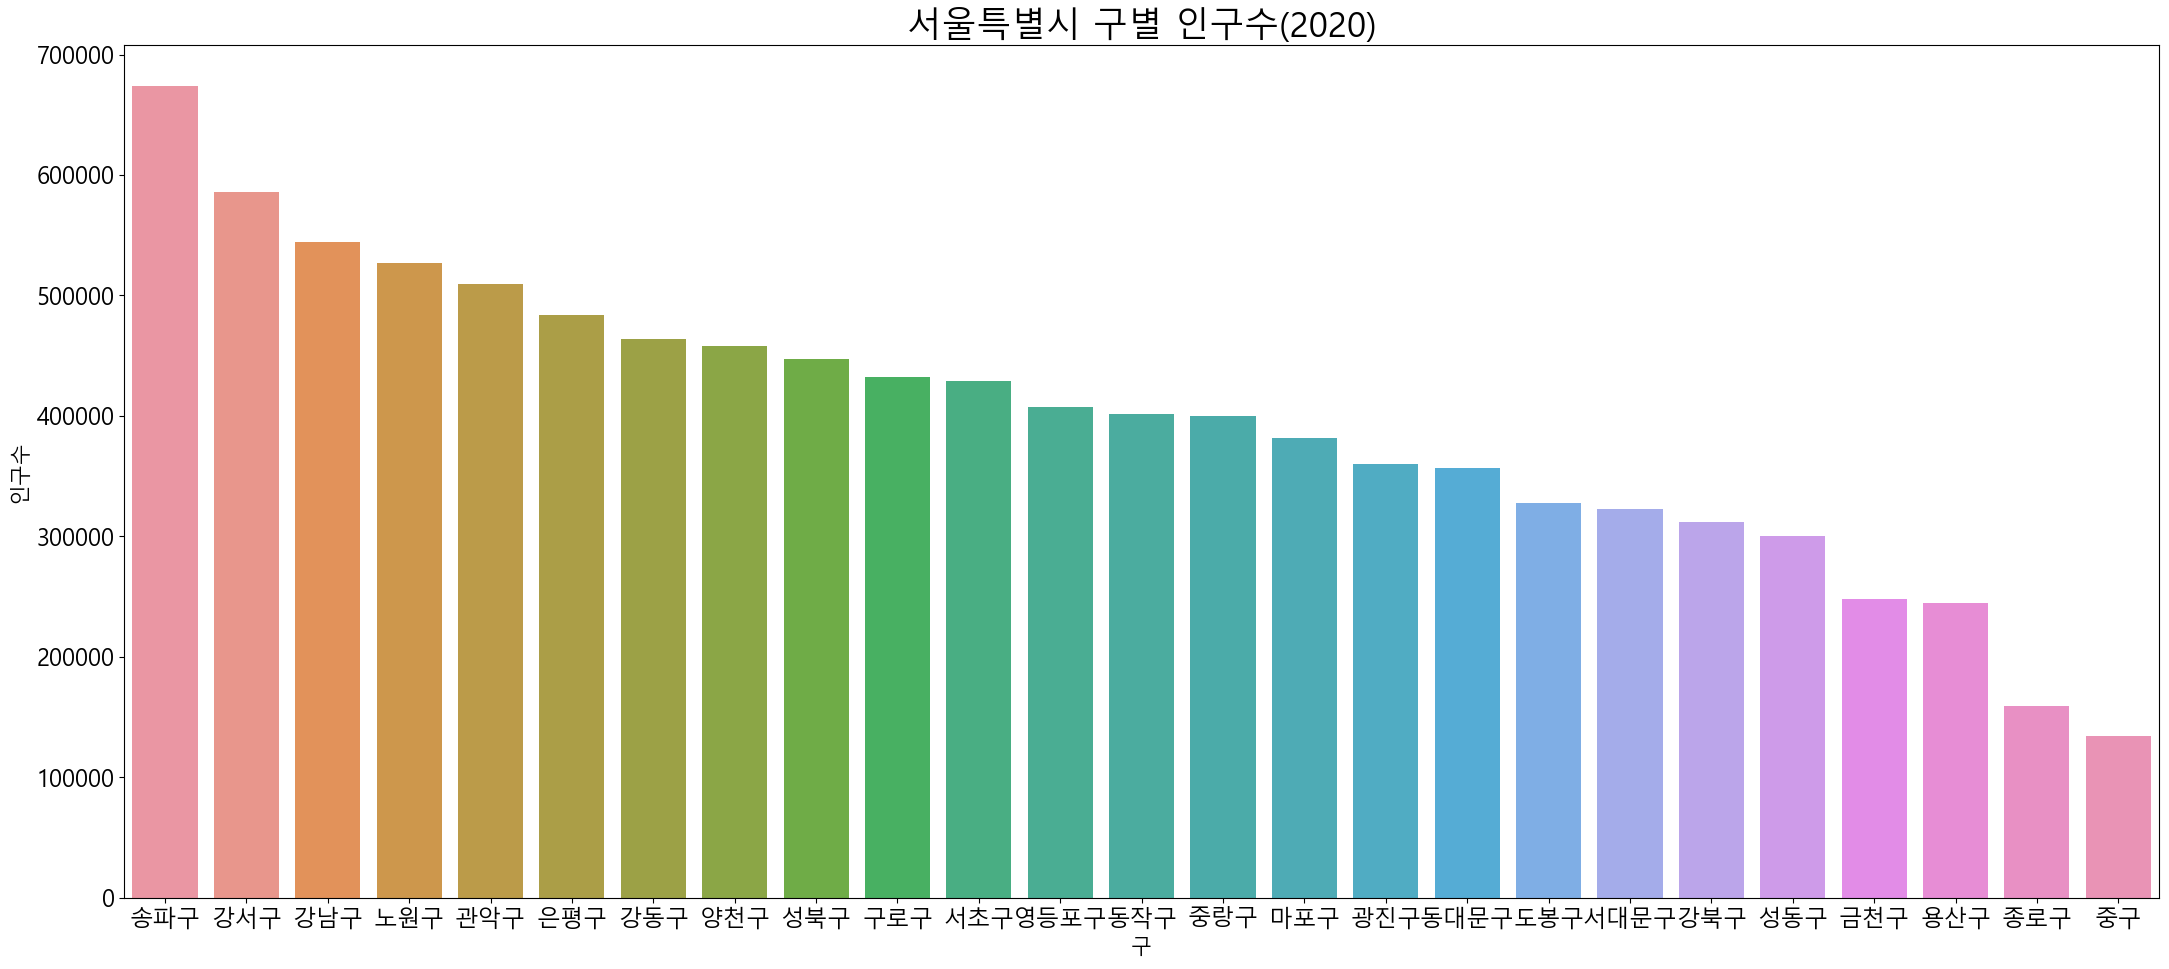

In [90]:
plt.figure(figsize=(22,10))
sns.barplot(data=seoul_p, x=seoul_p.index, y=seoul_p['인구수20'])
plt.xlabel('구', fontsize=15)
plt.ylabel('인구수', fontsize=15)
plt.title('서울특별시 구별 인구수(2020)', fontsize=25)
plt.tight_layout()
plt.show()

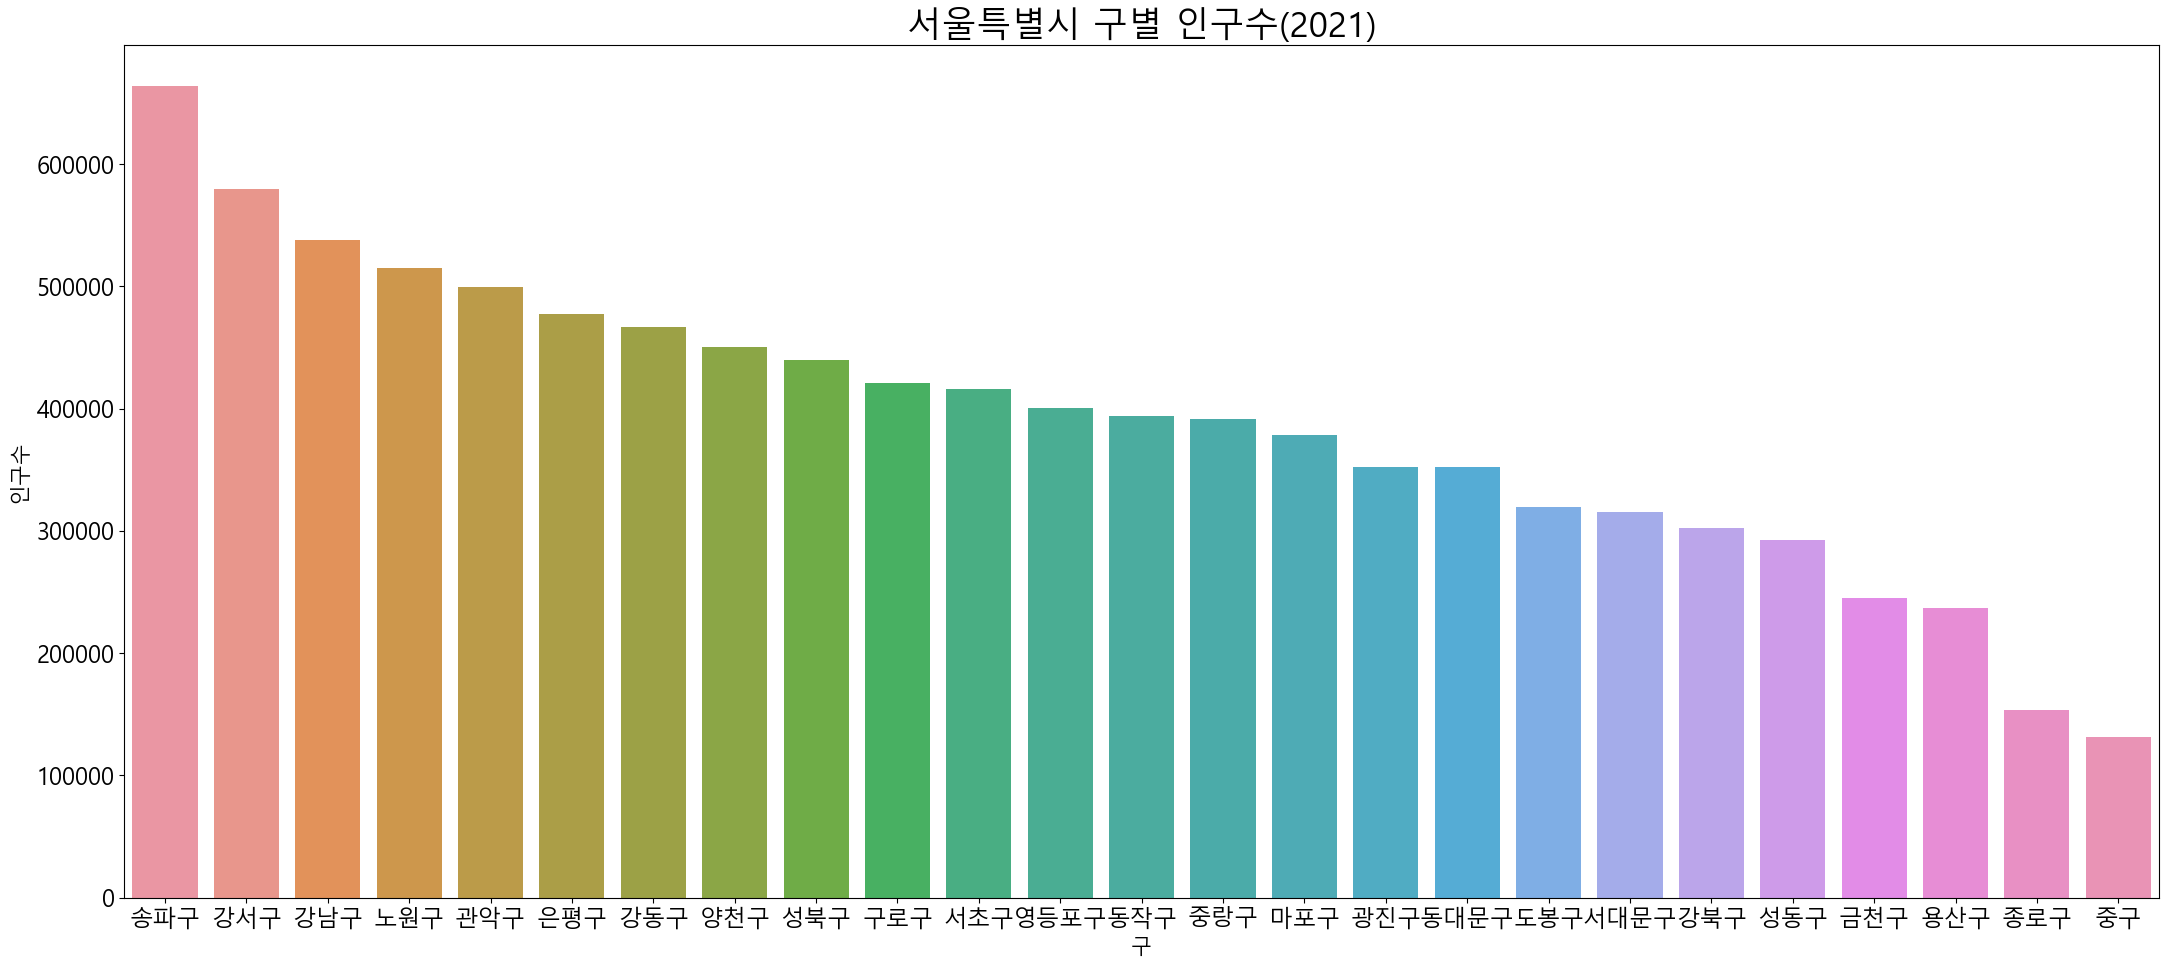

In [91]:
plt.figure(figsize=(22,10))
sns.barplot(data=seoul_p, x=seoul_p.index, y=seoul_p['인구수21'])
plt.xlabel('구', fontsize=15)
plt.ylabel('인구수', fontsize=15)
plt.title('서울특별시 구별 인구수(2021)', fontsize=25)
plt.tight_layout()
plt.show()

In [92]:
data1=pd.read_excel("서울20년1월부터12월.xlsx")

In [93]:
data1[['시','구','도로명']]=data1["주소"].str.split(' ', n=2, expand=True)
data2=data1.groupby('구')['충전량'].sum().sort_values(ascending=False)
data2= data2.reset_index()
seoul_2020_e=pd.DataFrame(data=data2)

In [94]:
seoul_2020_e=seoul_2020_e.loc[0:24]
seoul_2020_e=seoul_2020_e.rename(columns={'구':'구별'})
seoul_2020_e=seoul_2020_e.set_index('구별')
seoul_2020_e=seoul_2020_e.rename(columns = {'충전량':'충전량20'})

In [95]:
data3=pd.read_excel("서울21년1월부터12월이상치제거.xlsx")

In [96]:
data4=data3.groupby('구')['충전량'].sum().sort_values(ascending=False)
data4=data4.reset_index()
seoul_2021_e=pd.DataFrame(data=data4)

In [97]:
seoul_2021_e=seoul_2021_e.loc[0:24]
seoul_2021_e=seoul_2021_e.rename(columns={'구':'구별'})
seoul_2021_e=seoul_2021_e.set_index('구별')
seoul_2021_e=seoul_2021_e.rename(columns = {'충전량':'충전량21'})

In [98]:
seoul_e=pd.concat([seoul_2020_e,seoul_2021_e],axis=1,join='inner')

In [99]:
seoul_e

충전량20          충전량21
구별                             
송파구   646525.077  699737.222000
강남구   606185.845  673853.473000
마포구   360968.237  409718.452000
서초구   352935.750  383879.806000
용산구   345395.829  370739.710000
도봉구   299720.700  354368.200000
강동구   291056.920  350214.850000
광진구   276805.790  289193.840000
노원구   228357.650  264069.500000
양천구   214524.890  244234.444000
강서구   192768.230  246803.610000
영등포구  180659.000  227238.960000
중구    177318.398  166719.340000
구로구   177098.620  248361.267305
성북구   147801.220  174812.030000
성동구   129935.720  153320.154000
동대문구  119050.520  154004.761000
중랑구   111744.740  145736.281000
동작구    98046.320  104294.800000
금천구    96442.530   91443.620000
종로구    91895.340  109952.810000
은평구    81615.680  103160.430000
강북구    76395.670   91801.120000
관악구    74697.290  123389.610000
서대문구   61514.840   96402.650000

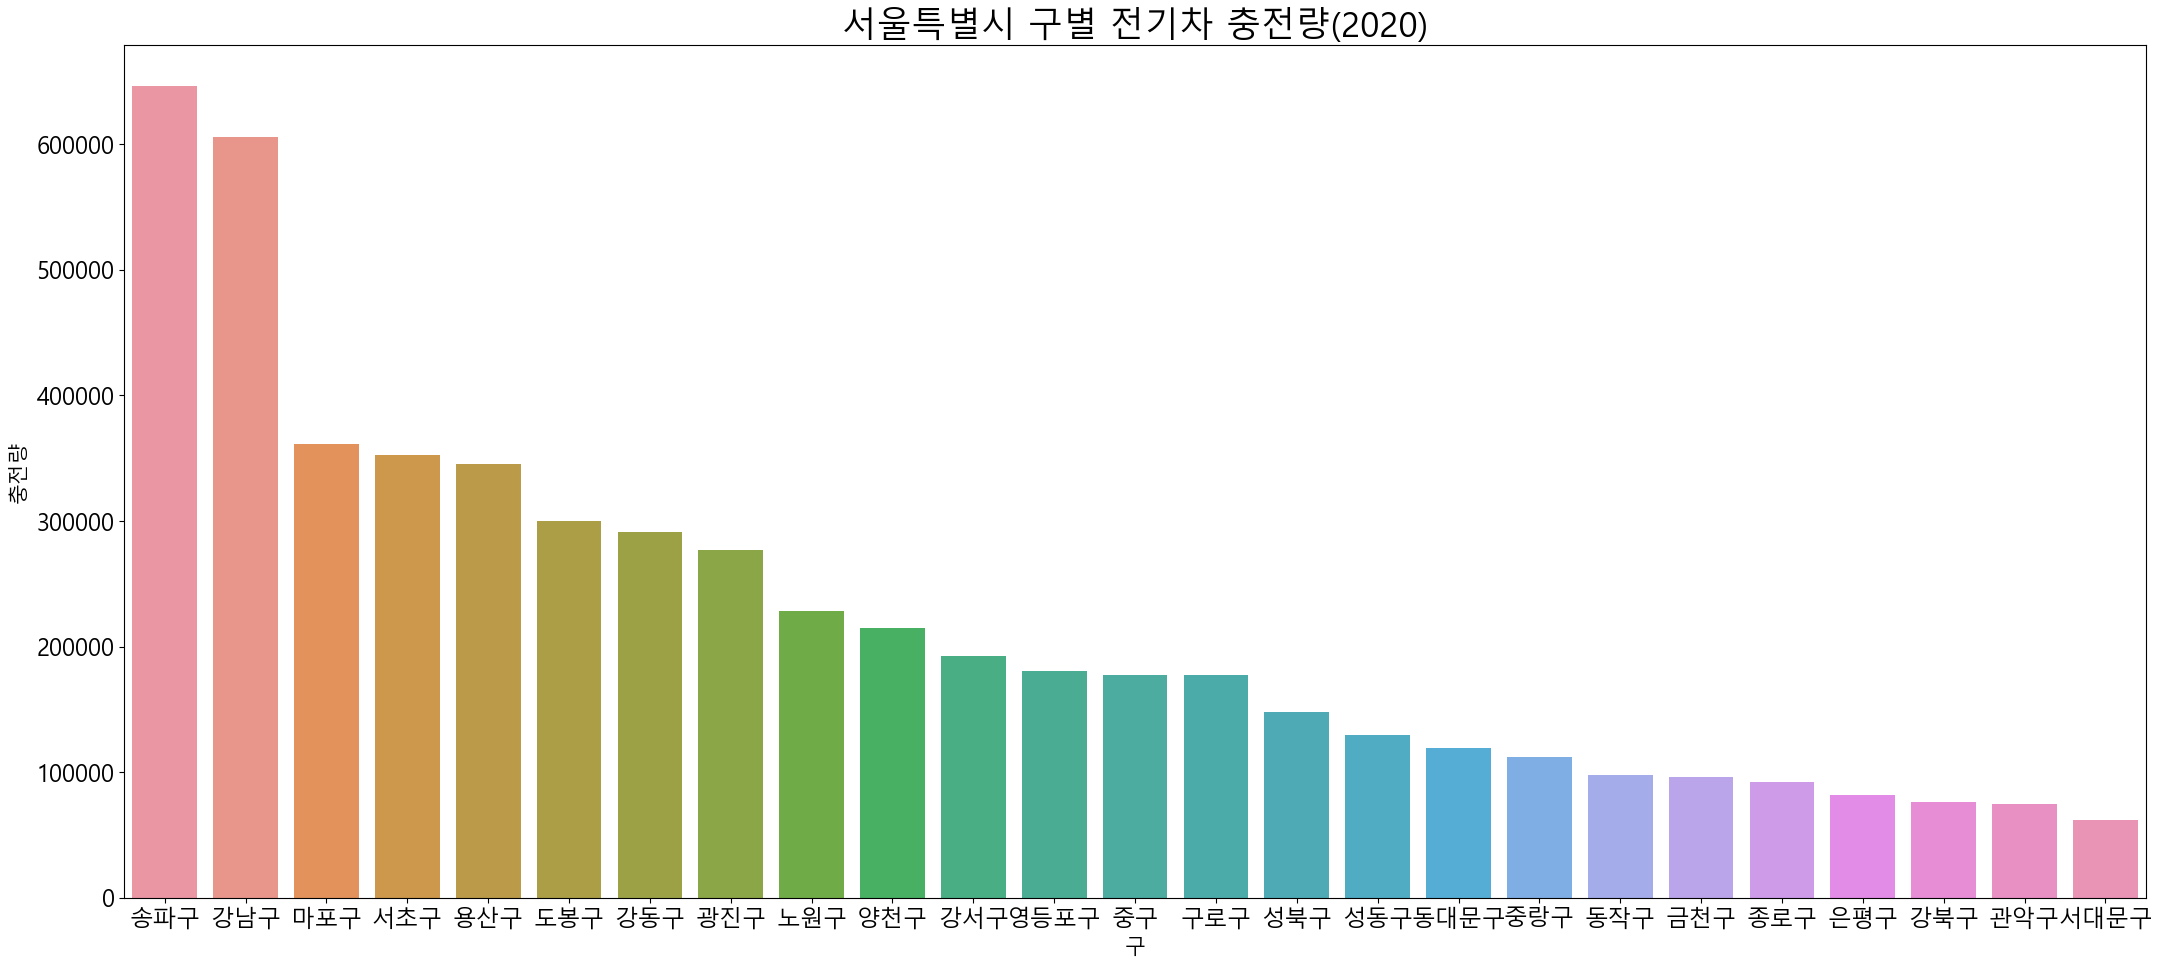

In [100]:
plt.figure(figsize=(22,10))
sns.barplot(data=seoul_e, x=seoul_e.index, y=seoul_e['충전량20'])
plt.xlabel('구', fontsize=15)
plt.ylabel('충전량', fontsize=15)
plt.title('서울특별시 구별 전기차 충전량(2020)', fontsize=25)
plt.tight_layout()
plt.show()

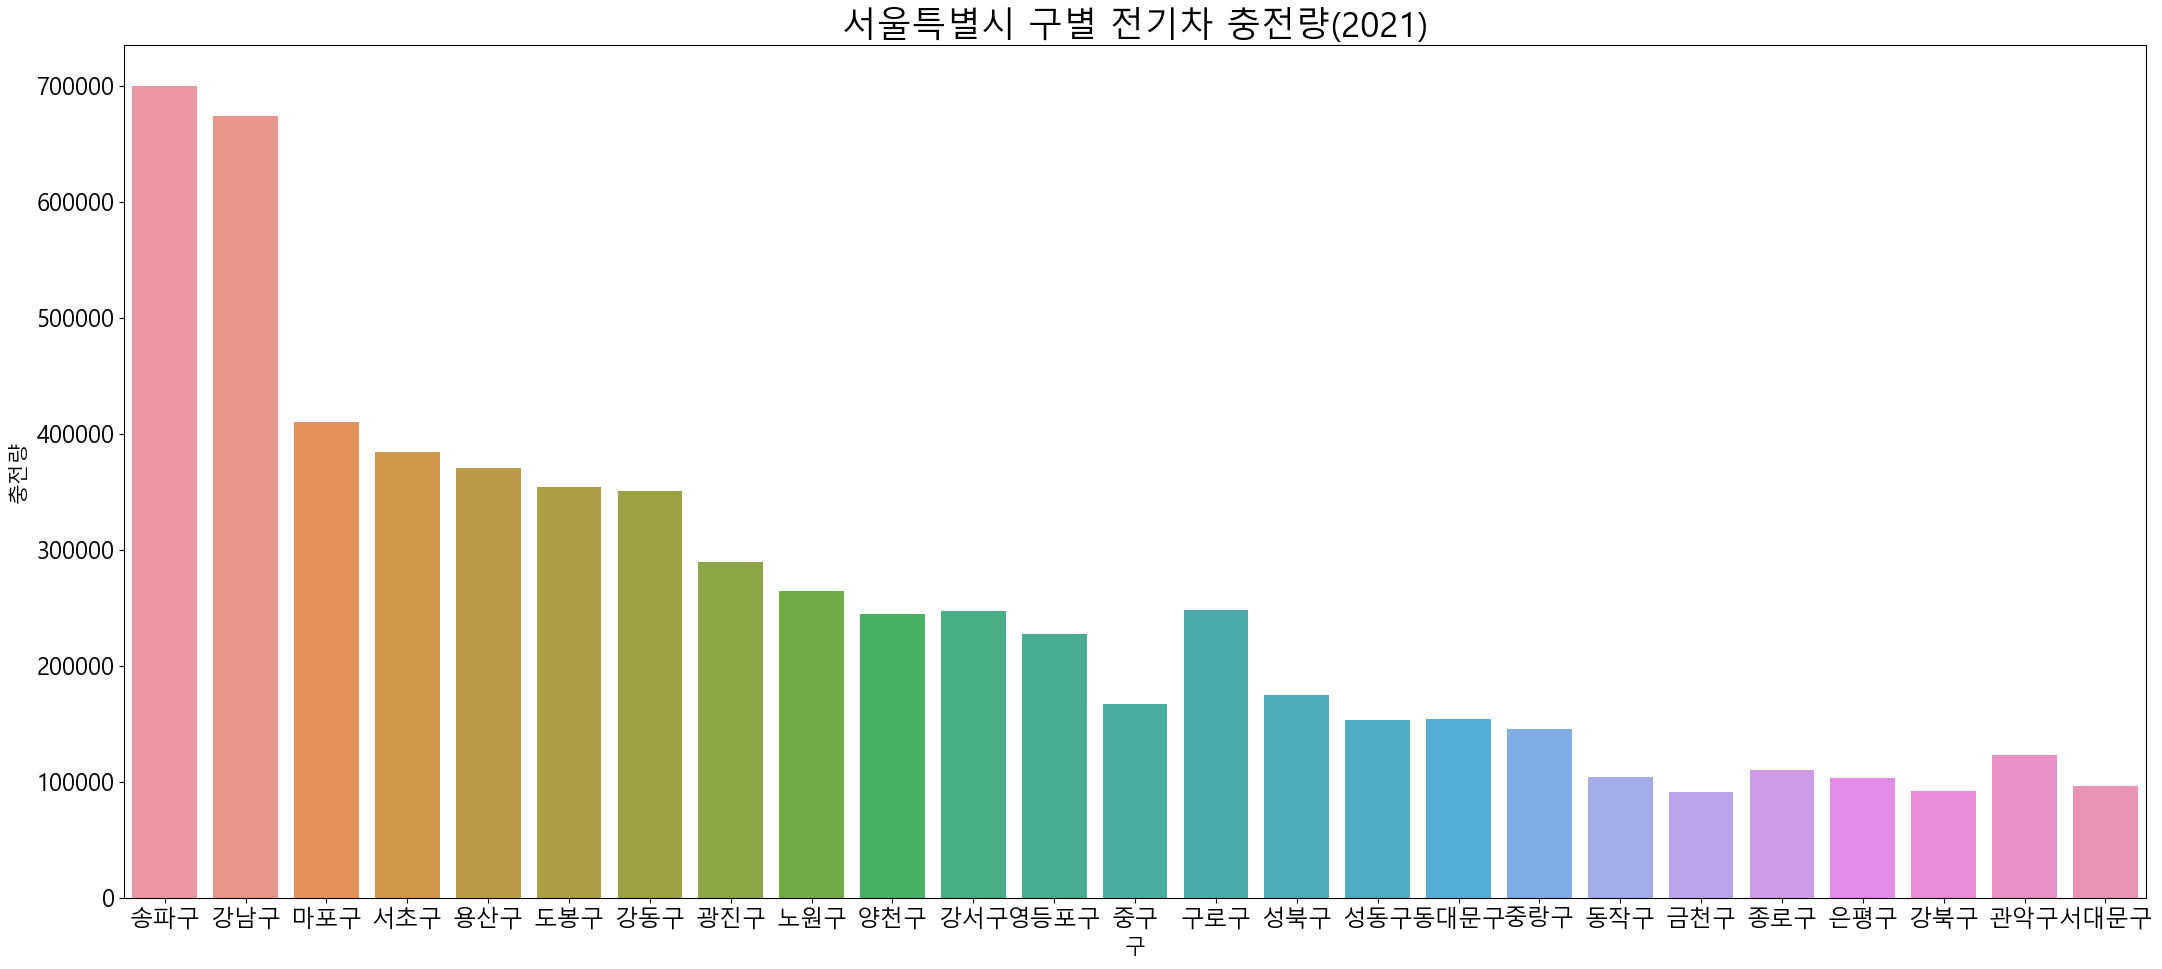

In [101]:
plt.figure(figsize=(22,10))
sns.barplot(data=seoul_e, x=seoul_e.index, y=seoul_e['충전량21'])
plt.xlabel('구', fontsize=15)
plt.ylabel('충전량', fontsize=15)
plt.title('서울특별시 구별 전기차 충전량(2021)', fontsize=25)
plt.tight_layout()
plt.show()

In [102]:
data5=pd.read_excel("21년 1월 기준 서울 자치구별 연료별 자동차등록 현황.xls")

In [103]:
data5=data5.drop(columns='Unnamed: 0')
data6=data5[data5['연료별']=='전기']
data6.reset_index(drop=True, inplace=True)
seoul_2020=data6.groupby('시군구별')['계'].sum().sort_values(ascending=False)
seoul_2020_c=pd.DataFrame(data=seoul_2020)
seoul_2020_c.reset_index(inplace=True)
seoul_2020_c.columns=['구','전기차대수']
seoul_2020_c=seoul_2020_c.rename(columns={'구':'구별','전기차대수':'전기차대수20'})
seoul_2020_c=seoul_2020_c.set_index('구별')

In [104]:
seoul_2020_c

전기차대수20
구별           
강남구      7490
서초구      2059
영등포구     1943
송파구      1084
구로구      1016
성동구       954
강서구       839
중구        707
강동구       657
마포구       579
양천구       546
성북구       535
은평구       490
노원구       488
용산구       475
금천구       434
중랑구       414
관악구       413
동작구       392
서대문구      377
도봉구       353
동대문구      313
강북구       302
광진구       300
종로구       281

In [105]:
data7=pd.read_excel("22년 1월 기준 서울 자치구별 연료별 자동차등록 현황.xls")

In [106]:
# data7=data7.drop(columns='Unnamed: 0')
data8=data7[data7['연료별']=='전기']
data8.reset_index(drop=True, inplace=True)
seoul_2021=data8.groupby('시군구별')['계'].sum().sort_values(ascending=False)
seoul_2021_c=pd.DataFrame(data=seoul_2021)
seoul_2021_c.reset_index(inplace=True)
seoul_2021_c.columns=['구','전기차대수']
seoul_2021_c=seoul_2021_c.rename(columns={'구':'구별','전기차대수':'전기차대수21'})
seoul_2021_c=seoul_2021_c.set_index('구별')

In [107]:
seoul_2021_c

전기차대수21
구별           
강남구     11736
구로구      3790
서초구      3546
영등포구     2407
송파구      1968
강서구      1768
성동구      1457
강동구      1279
마포구      1076
양천구       996
용산구       968
중구        964
성북구       915
은평구       894
노원구       893
관악구       762
중랑구       757
동작구       719
서대문구      668
동대문구      662
도봉구       642
광진구       613
종로구       606
금천구       550
강북구       504

In [108]:
seoul_c=pd.concat([seoul_2020_c,seoul_2021_c],axis=1,join='inner')

In [109]:
seoul_c

전기차대수20  전기차대수21
구별                    
강남구      7490    11736
서초구      2059     3546
영등포구     1943     2407
송파구      1084     1968
구로구      1016     3790
성동구       954     1457
강서구       839     1768
중구        707      964
강동구       657     1279
마포구       579     1076
양천구       546      996
성북구       535      915
은평구       490      894
노원구       488      893
용산구       475      968
금천구       434      550
중랑구       414      757
관악구       413      762
동작구       392      719
서대문구      377      668
도봉구       353      642
동대문구      313      662
강북구       302      504
광진구       300      613
종로구       281      606

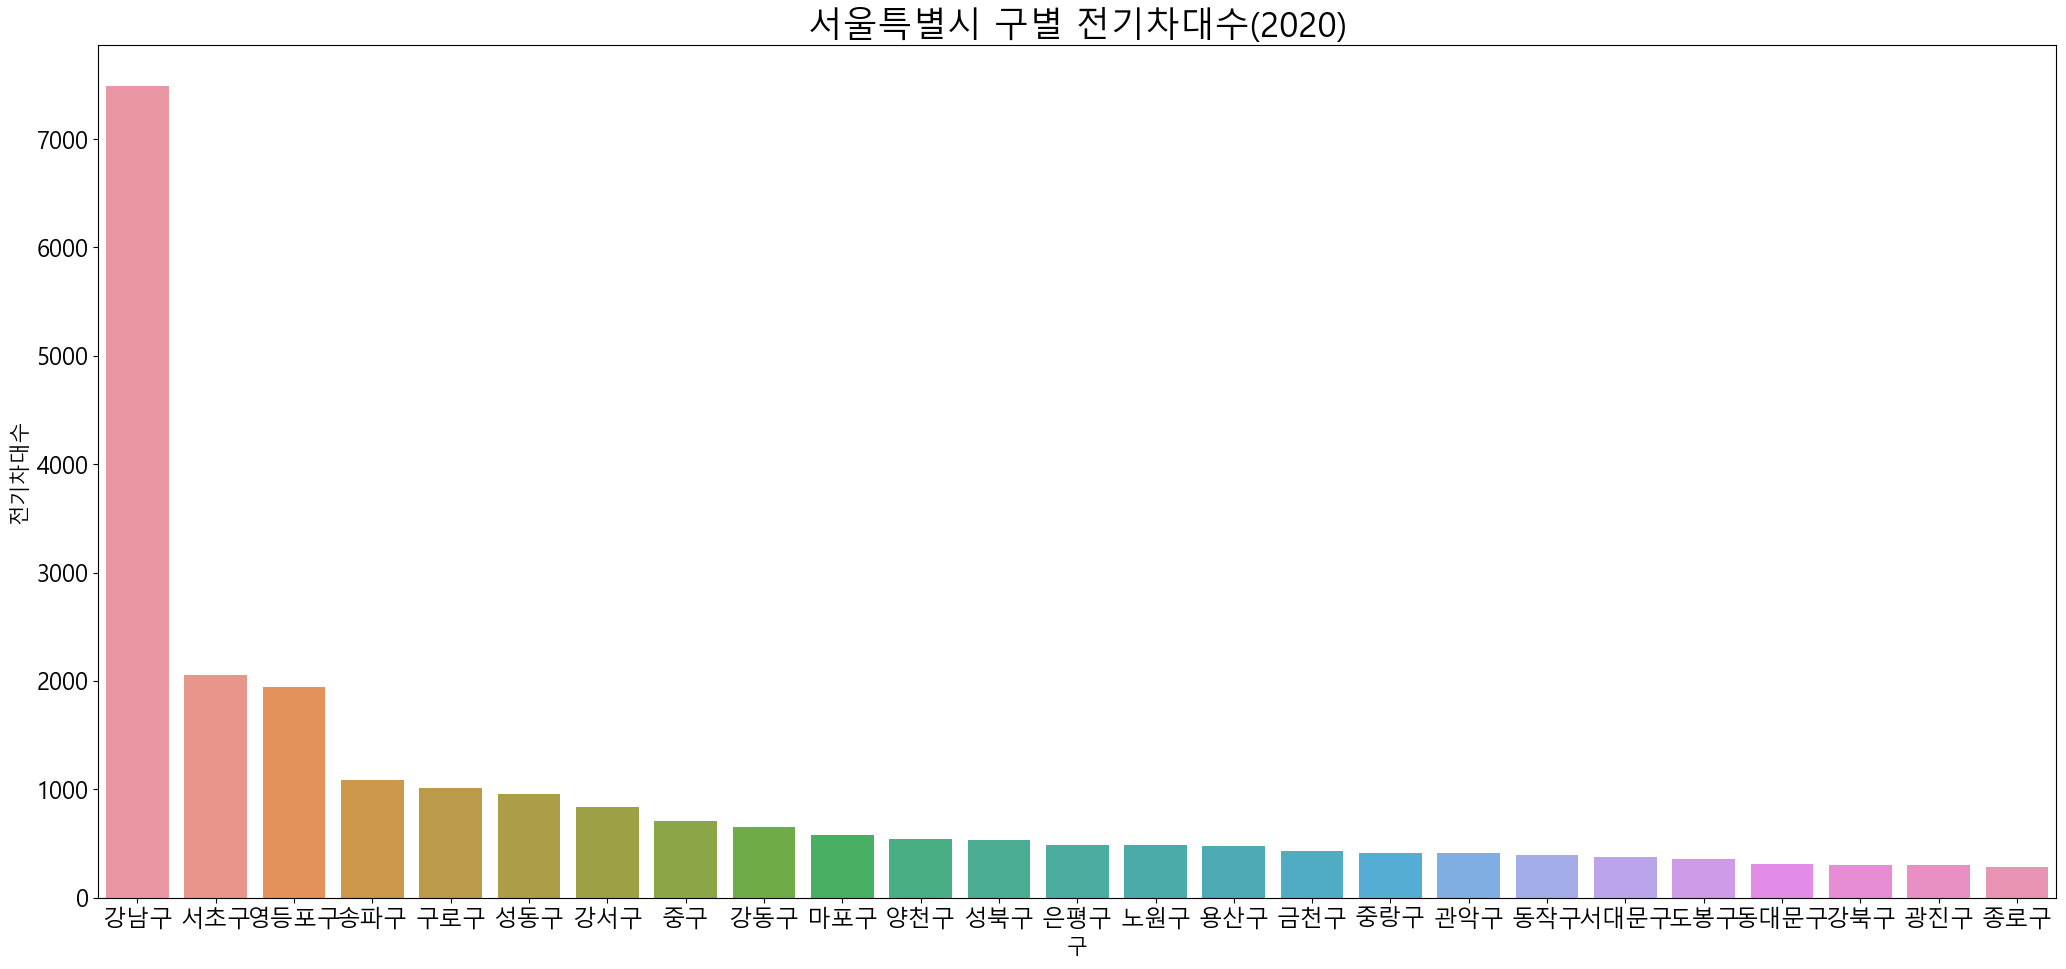

In [110]:
plt.figure(figsize=(21,10))
sns.barplot(data=seoul_c, x=seoul_c.index, y=seoul_c['전기차대수20'])
plt.xlabel('구', fontsize=15)
plt.ylabel('전기차대수', fontsize=15)
plt.title('서울특별시 구별 전기차대수(2020)', fontsize=25)
plt.tight_layout()
plt.show()

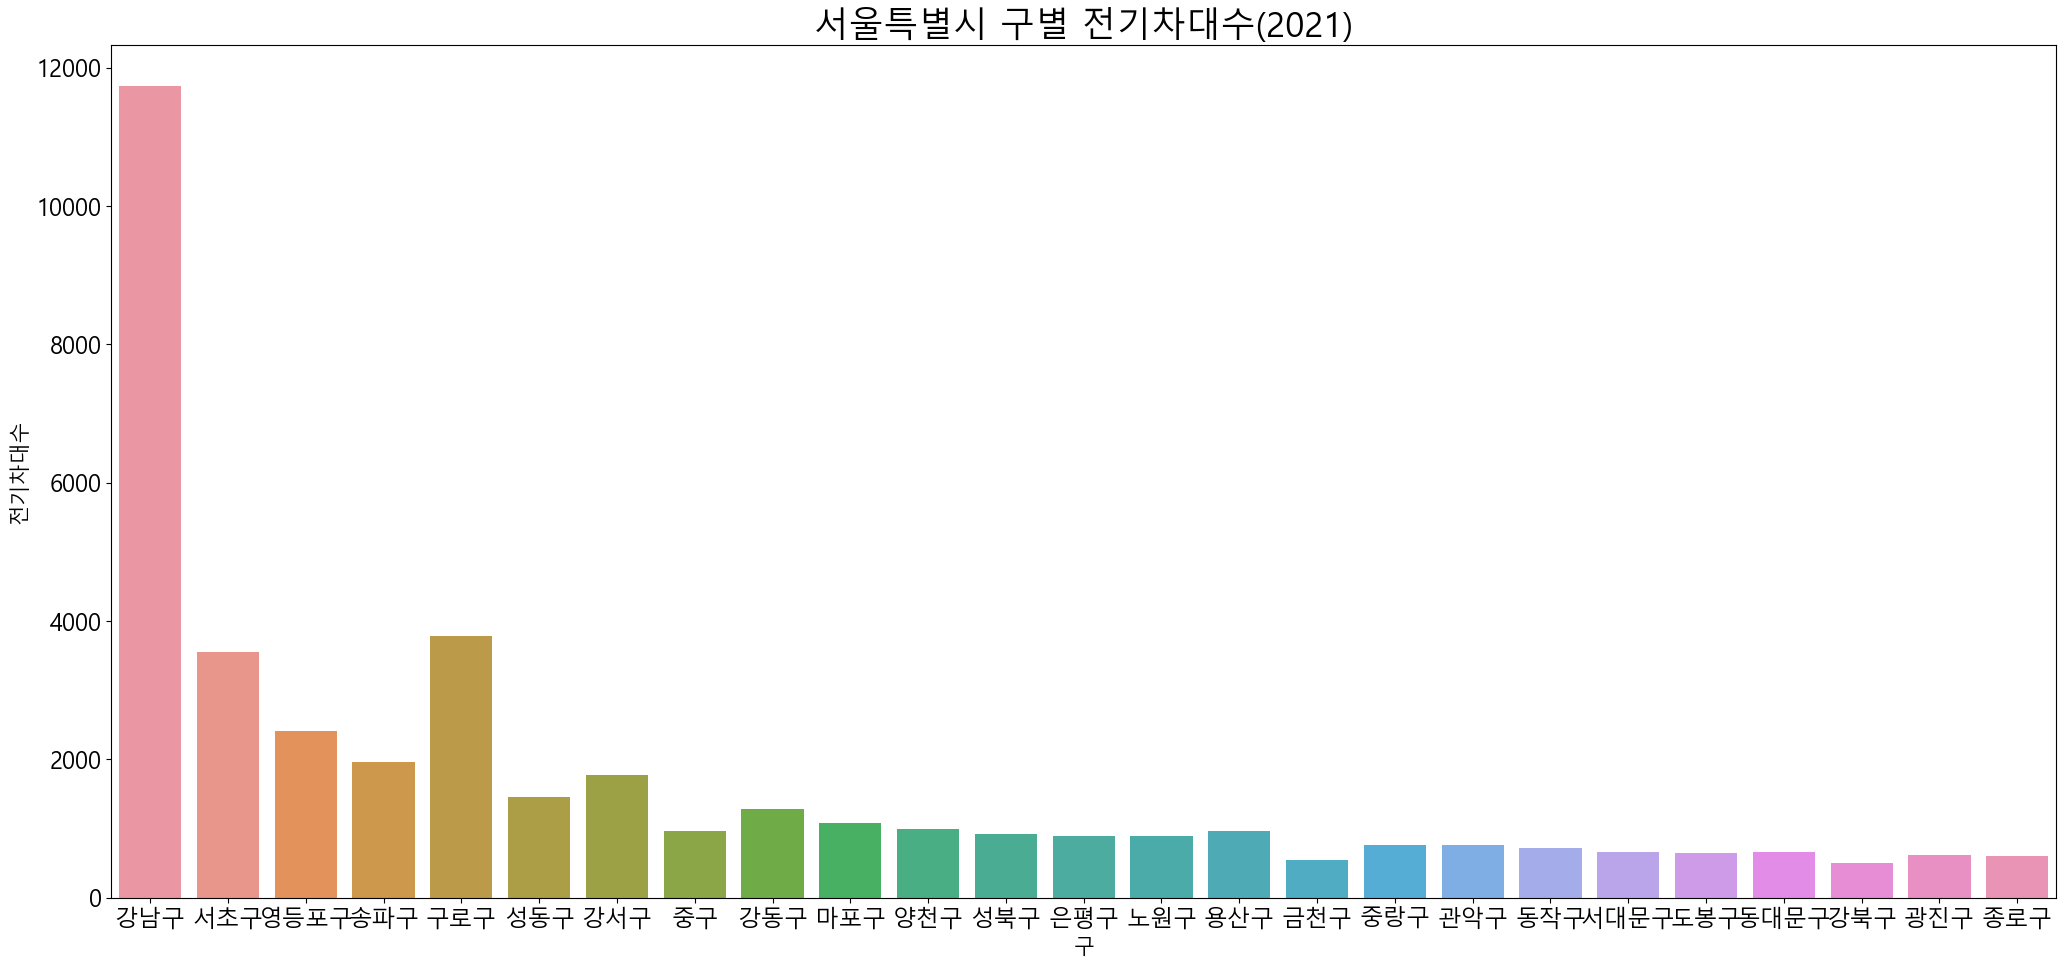

In [111]:
plt.figure(figsize=(21,10))
sns.barplot(data=seoul_c, x=seoul_c.index, y=seoul_c['전기차대수21'])
plt.xlabel('구', fontsize=15)
plt.ylabel('전기차대수', fontsize=15)
plt.title('서울특별시 구별 전기차대수(2021)', fontsize=25)
plt.tight_layout()
plt.show()

In [112]:
data9=pd.read_excel('서울전기차충전소.xlsx')

In [113]:
data9['구']=data9['addr'].str.split(' ').str.get(1)
seoul_a = data9.groupby('구').count()
seoul_a = seoul_a.iloc[:,0].reset_index()
seoul_a = seoul_a.rename(columns={'구':'구별','Unnamed: 0':'충전기대수'})
seoul_a = seoul_a.set_index('구별')

In [114]:
seoul_a

충전기대수
구별         
강남구     960
강동구     397
강북구     222
강서구     834
관악구     372
광진구     225
구로구     719
금천구     497
노원구     524
도봉구     318
동대문구    516
동작구     410
마포구     585
서대문구    361
서초구     968
성동구     690
성북구     642
송파구     890
양천구     577
영등포구    597
용산구     432
은평구     524
종로구     283
중구      396
중랑구     436

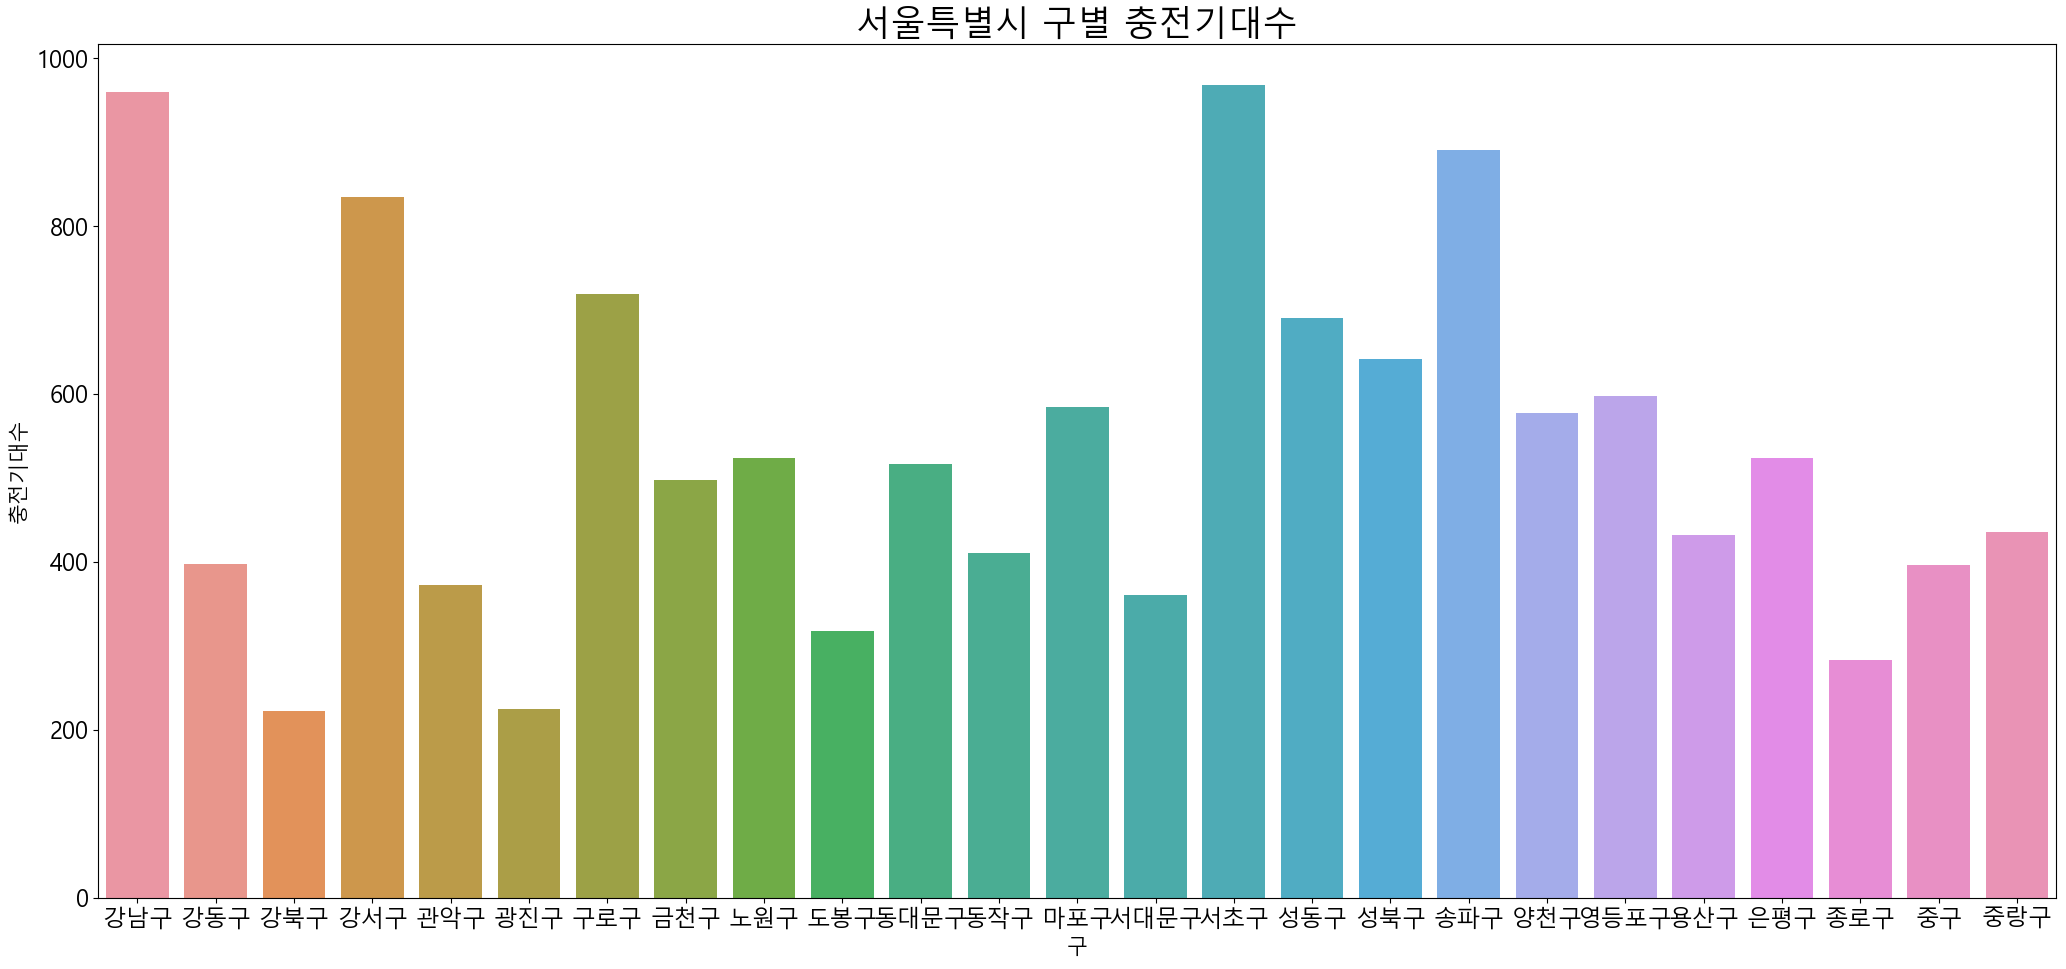

In [115]:
plt.figure(figsize=(21,10))
sns.barplot(data=seoul_a, x=seoul_a.index, y=seoul_a['충전기대수'])
plt.xlabel('구', fontsize=15)
plt.ylabel('충전기대수', fontsize=15)
plt.title('서울특별시 구별 충전기대수', fontsize=25)
plt.tight_layout()
plt.show()

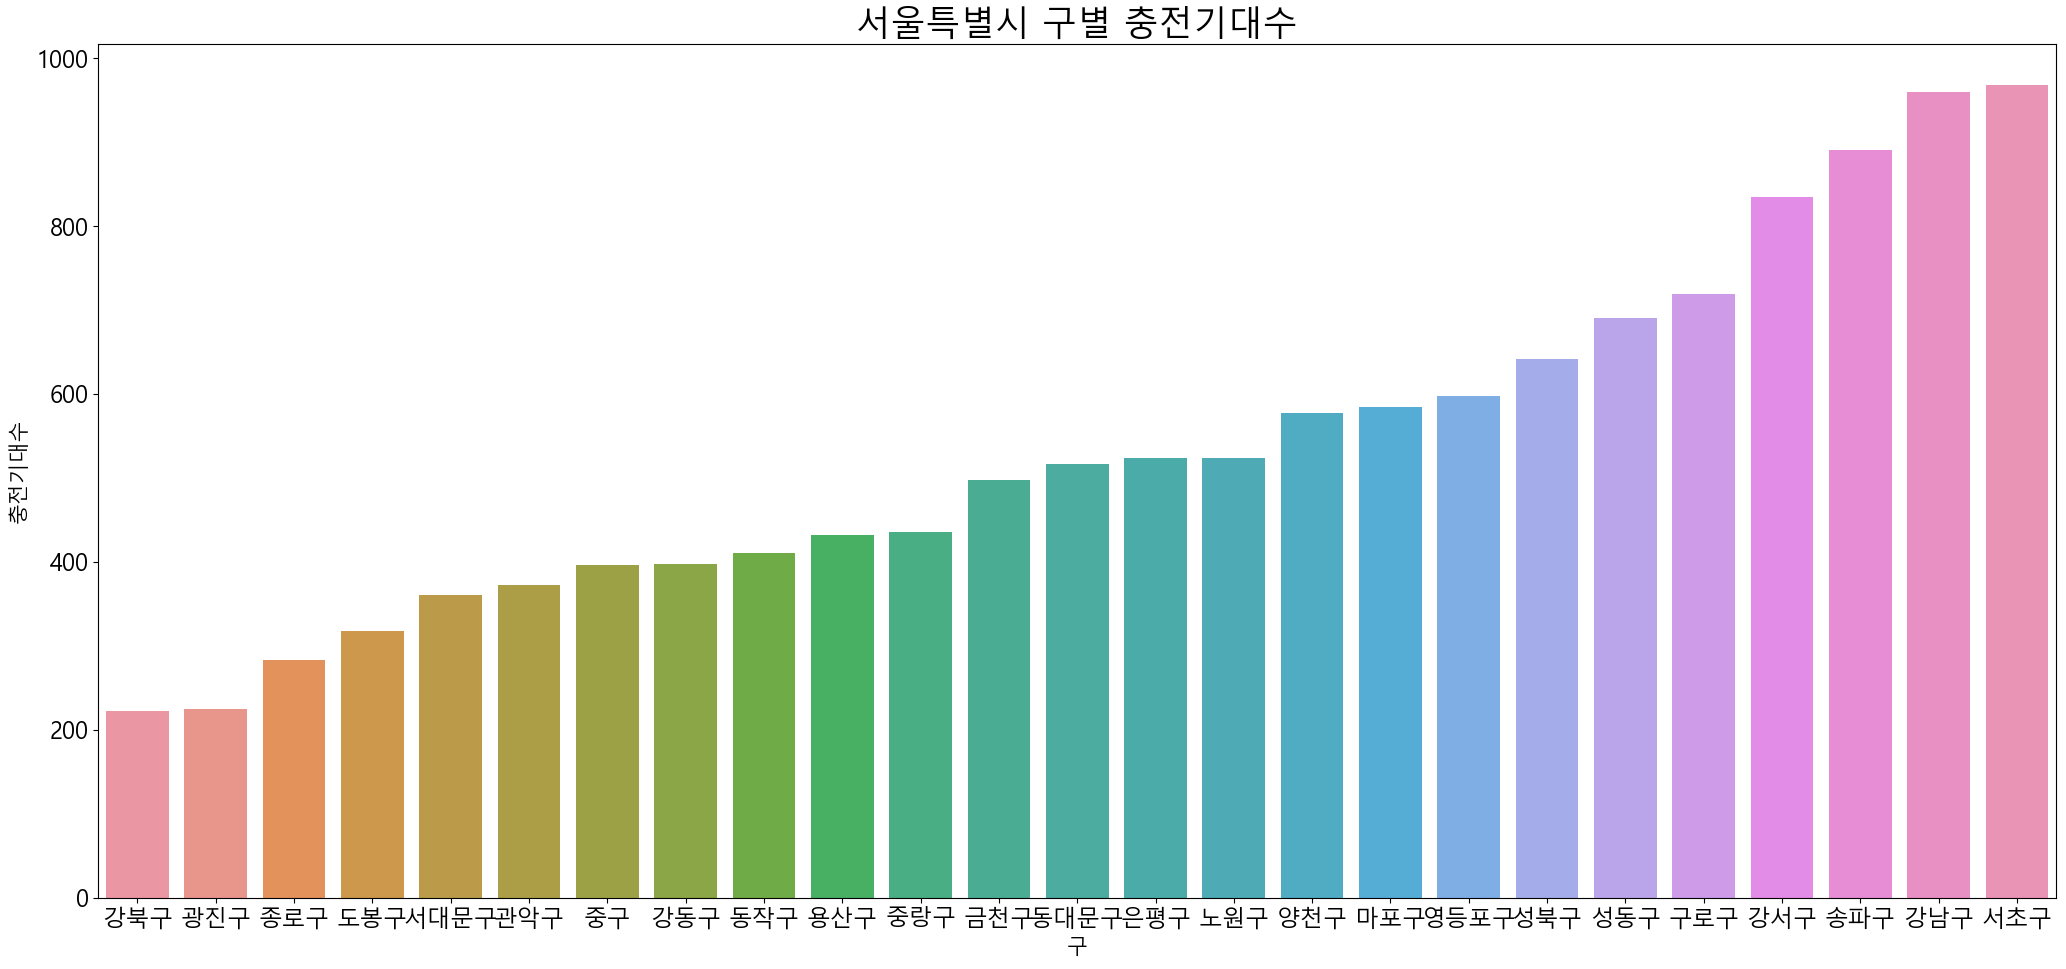

In [143]:
seoul_a = seoul_a.sort_values(by='충전기대수')
plt.figure(figsize=(21,10))
sns.barplot(data=seoul_a, x=seoul_a.index, y=seoul_a['충전기대수'])
plt.xlabel('구', fontsize=15)
plt.ylabel('충전기대수', fontsize=15)
plt.title('서울특별시 구별 충전기대수', fontsize=25)
plt.tight_layout()
plt.show()

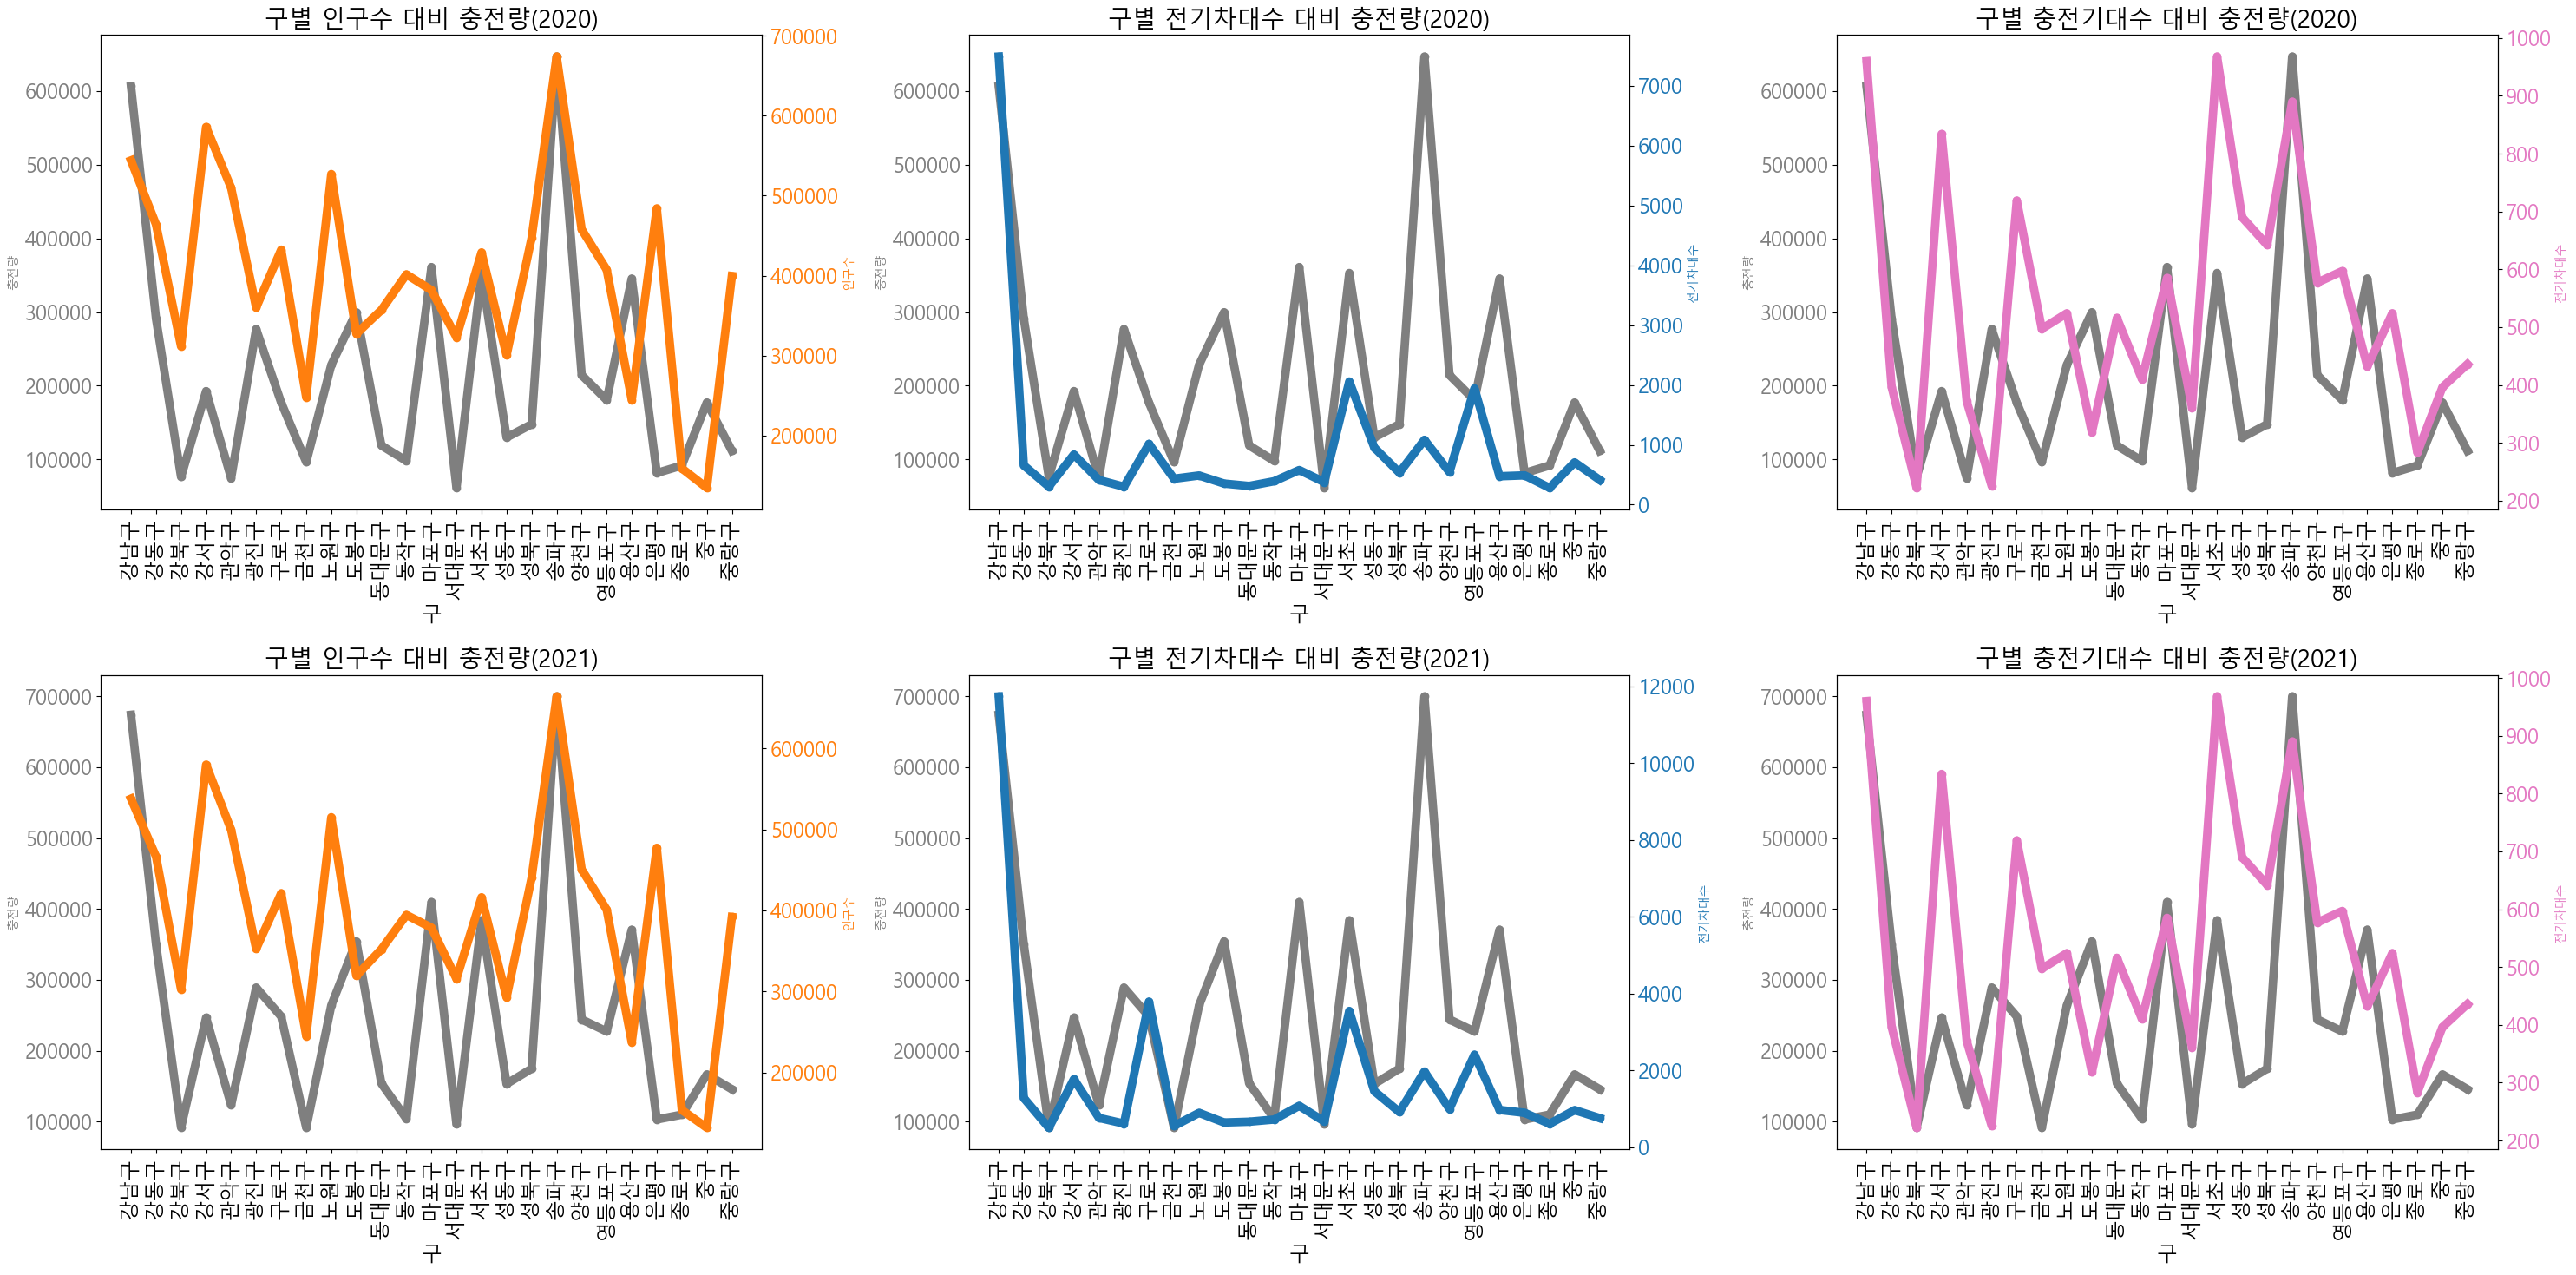

In [116]:
seoul_p=seoul_p.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
seoul_c=seoul_c.sort_index(ascending=True)
seoul_a=seoul_a.sort_index(ascending=True)

fig, ax1 = plt.subplots(figsize=(30,15),nrows=2,ncols=3)
# 1행 1열 
color_1 = 'tab:gray'
ax1[0,0].set_title('구별 인구수 대비 충전량(2020)', fontsize=20)
ax1[0,0].set_xlabel('구')
ax1[0,0].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[0,0].plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1[0,0].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)
ax1[0,0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('인구수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_p.인구수20, marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

# 1행 2열 
color_1 = 'tab:gray'
ax1[0,1].set_title('구별 전기차대수 대비 충전량(2020)', fontsize=20)
ax1[0,1].set_xlabel('구')
ax1[0,1].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[0,1].plot(seoul_e.index, seoul_e.충전량20,marker='o', color=color_1,linewidth=7)
ax1[0,1].set_xticklabels(ax1[0,1].get_xticklabels(),rotation=90)
ax1[0,1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:blue'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_c.전기차대수20, marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

# 1행 3열 
color_1 = 'tab:gray'
ax1[0,2].set_title('구별 충전기대수 대비 충전량(2020)', fontsize=20)
ax1[0,2].set_xlabel('구')
ax1[0,2].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[0,2].plot(seoul_e.index, seoul_e.충전량20,marker='o', color=color_1,linewidth=7)
ax1[0,2].set_xticklabels(ax1[0,2].get_xticklabels(),rotation=90)
ax1[0,2].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,2].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_a.충전기대수, marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)


# 2행 1열 
color_1 = 'tab:gray'
ax1[1,0].set_title('구별 인구수 대비 충전량(2021)', fontsize=20)
ax1[1,0].set_xlabel('구')
ax1[1,0].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[1,0].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1[1,0].set_xticklabels(ax1[1,0].get_xticklabels(),rotation=90)
ax1[1,0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('인구수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_p.인구수21, marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

# 2행 2열 
color_1 = 'tab:gray'
ax1[1,1].set_title('구별 전기차대수 대비 충전량(2021)', fontsize=20)
ax1[1,1].set_xlabel('구')
ax1[1,1].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[1,1].plot(seoul_e.index, seoul_e.충전량21,marker='o', color=color_1,linewidth=7)
ax1[1,1].set_xticklabels(ax1[1,1].get_xticklabels(),rotation=90)
ax1[1,1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:blue'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_c.전기차대수21, marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

# 2행 3열 
color_1 = 'tab:gray'
ax1[1,2].set_title('구별 충전기대수 대비 충전량(2021)', fontsize=20)
ax1[1,2].set_xlabel('구')
ax1[1,2].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[1,2].plot(seoul_e.index, seoul_e.충전량21,marker='o', color=color_1,linewidth=7)
ax1[1,2].set_xticklabels(ax1[1,2].get_xticklabels(),rotation=90)
ax1[1,2].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,2].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_a.충전기대수, marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()

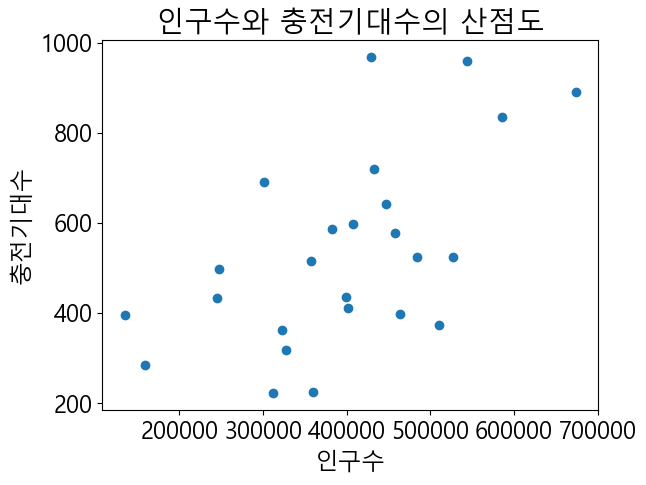

In [117]:
plt.scatter(seoul_p['인구수20'],seoul_a['충전기대수'])
plt.xlabel('인구수')
plt.ylabel('충전기대수')
plt.title('인구수와 충전기대수의 산점도')
plt.show()

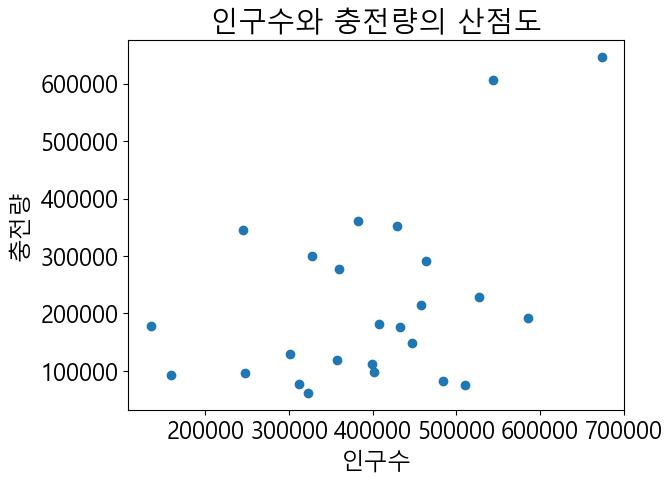

In [118]:
plt.scatter(seoul_p['인구수20'],seoul_e['충전량20'])
plt.xlabel('인구수')
plt.ylabel('충전량')
plt.title('인구수와 충전량의 산점도')
plt.show()

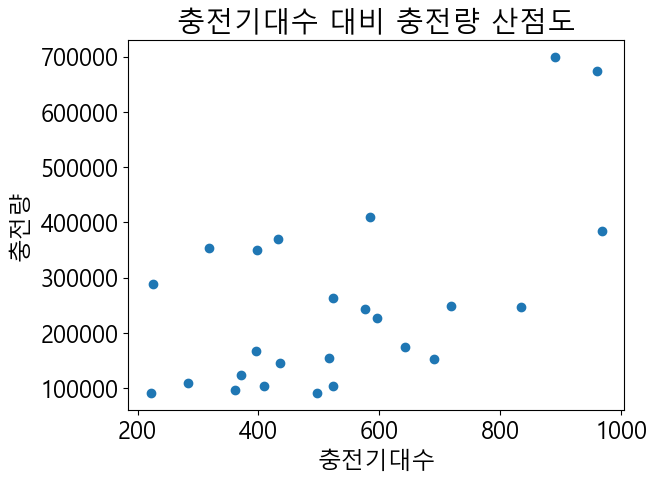

In [119]:
plt.scatter(seoul_a['충전기대수'],seoul_e['충전량21'])
plt.xlabel('충전기대수')
plt.ylabel('충전량')
plt.title('충전기대수 대비 충전량 산점도')
plt.show()

            인구수20     인구수21     충전량20     충전량21   전기차대수20   전기차대수21     충전기대수
인구수20    1.000000  0.999701  0.452657  0.504795  0.310980  0.347999  0.590704
인구수21    0.999701  1.000000  0.454666  0.506840  0.312416  0.348128  0.588450
충전량20    0.452657  0.454666  1.000000  0.993652  0.594817  0.599425  0.567968
충전량21    0.504795  0.506840  0.993652  1.000000  0.606662  0.621635  0.588682
전기차대수20  0.310980  0.312416  0.594817  0.606662  1.000000  0.978915  0.600865
전기차대수21  0.347999  0.348128  0.599425  0.621635  0.978915  1.000000  0.642557
충전기대수    0.590704  0.588450  0.567968  0.588682  0.600865  0.642557  1.000000


<Axes: >

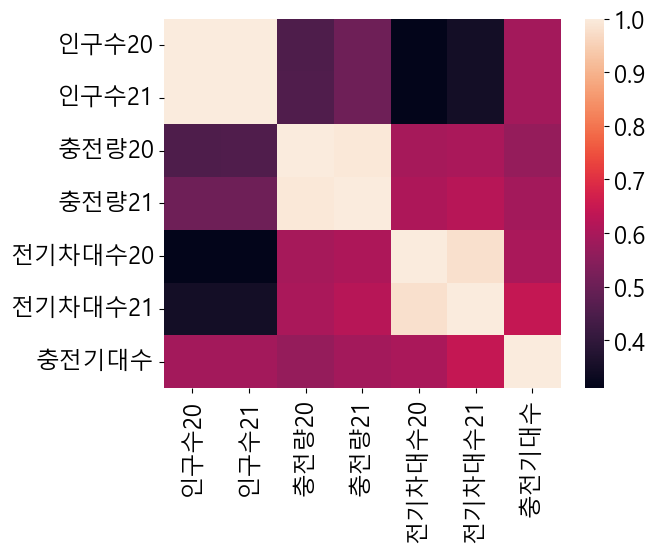

In [120]:
seoul_p.sort_index(ascending=True)
seoul_e.sort_index(ascending=True)
seoul_c.sort_index(ascending=True)
seoul_a.sort_index(ascending=True)
table=pd.concat([seoul_p,seoul_e,seoul_c,seoul_a],axis=1)
print(table.corr())
sns.heatmap(table.corr())

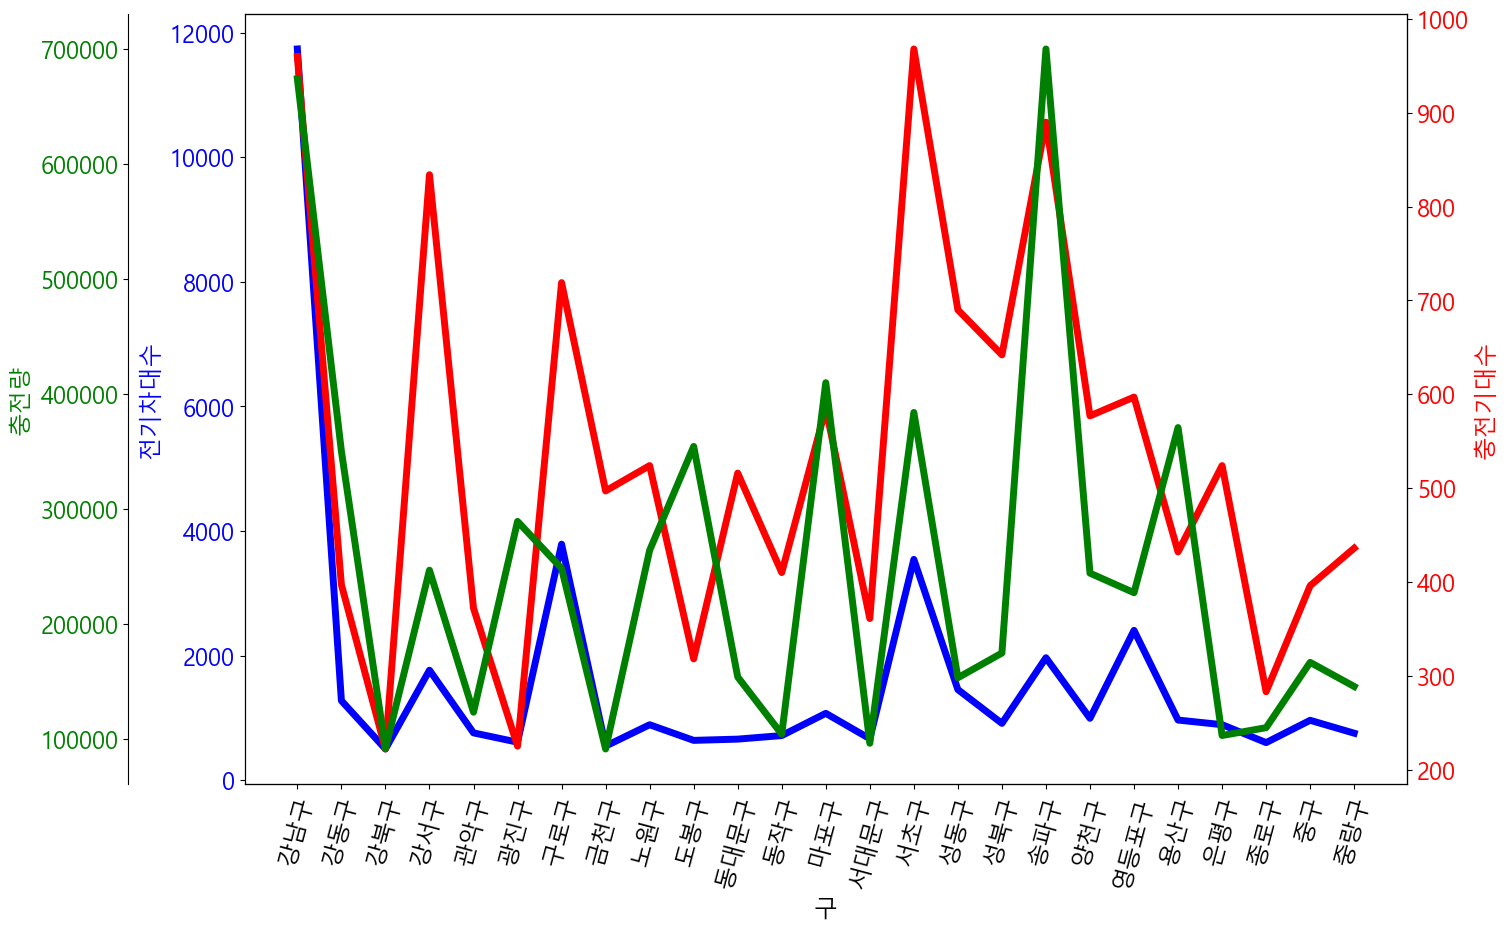

In [121]:
seoul_p=seoul_p.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
seoul_c=seoul_c.sort_index(ascending=True)
seoul_a=seoul_a.sort_index(ascending=True)

fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
 
color1 = 'b'
ax1.plot(seoul_c.index, seoul_c['전기차대수21'], color=color1,linewidth=5)
ax1.set_xlabel('구')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=75)
ax1.set_ylabel('전기차대수', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(seoul_c.index, seoul_a['충전기대수'], color=color2,linewidth=5)
ax2.set_ylabel('충전기대수', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(seoul_c.index, seoul_e['충전량21'], color=color3,linewidth=5)
ax3.set_ylabel('충전량', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.left.set_position(("axes", -0.1)) 
ax3.yaxis.set_label_position('left') 
ax3.yaxis.set_ticks_position('left')

plt.show()

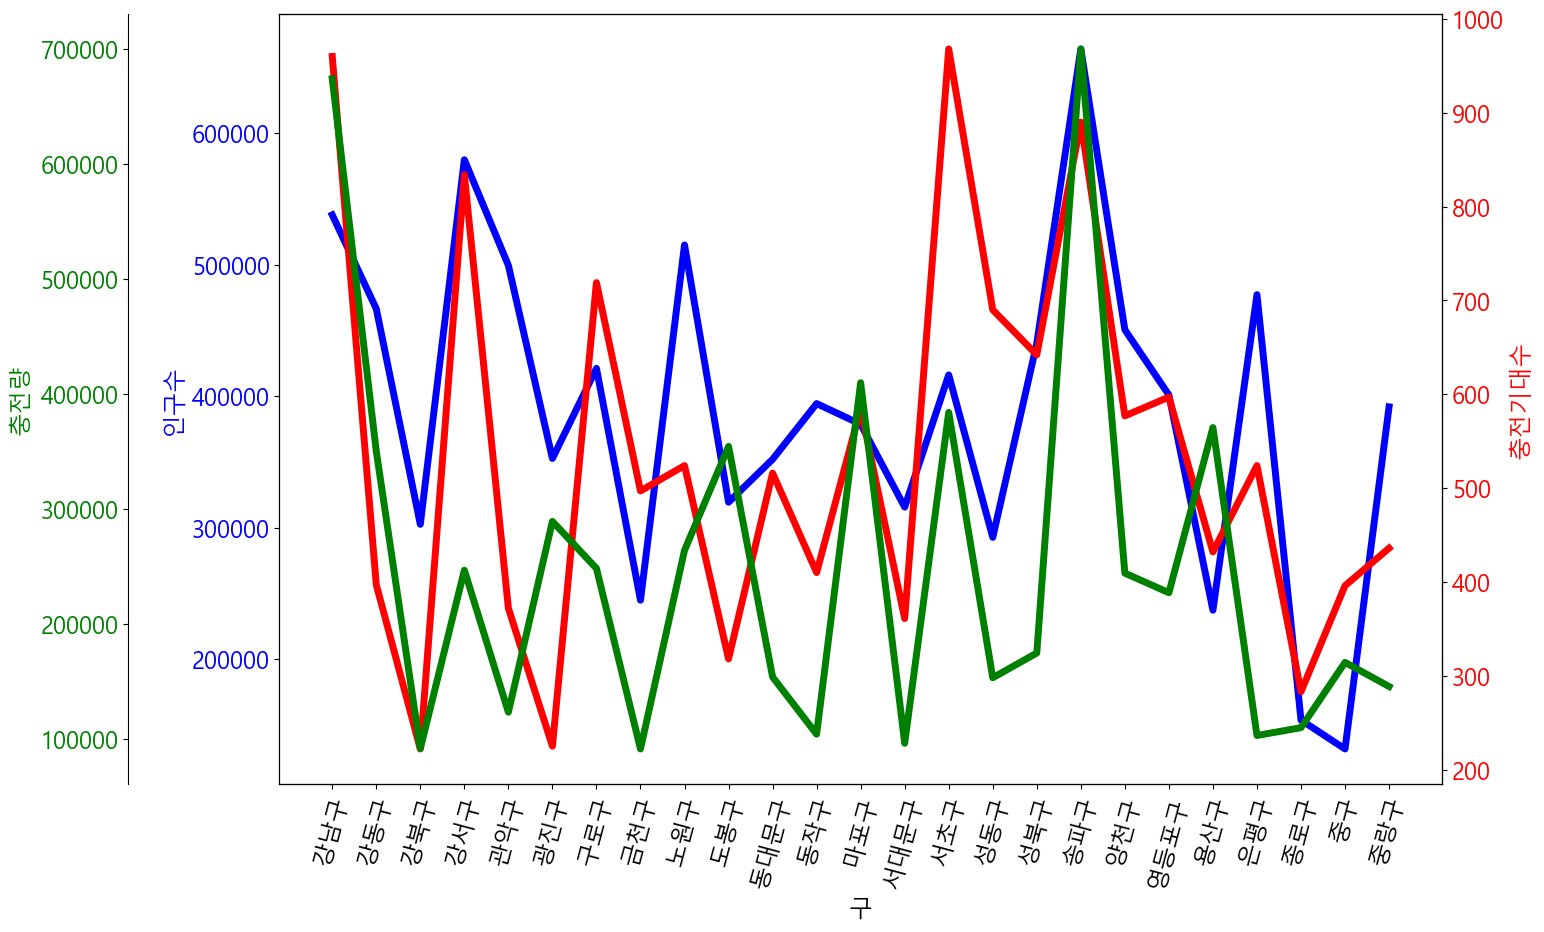

In [147]:
seoul_p=seoul_p.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
seoul_c=seoul_c.sort_index(ascending=True)
seoul_a=seoul_a.sort_index(ascending=True)

fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
 
color1 = 'b'
ax1.plot(seoul_p.index, seoul_p['인구수21'], color=color1,linewidth=5)
ax1.set_xlabel('구')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=75)
ax1.set_ylabel('인구수', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(seoul_p.index, seoul_a['충전기대수'], color=color2,linewidth=5)
ax2.set_ylabel('충전기대수', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(seoul_p.index, seoul_e['충전량21'], color=color3,linewidth=5)
ax3.set_ylabel('충전량', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.left.set_position(("axes", -0.13)) 
ax3.yaxis.set_label_position('left') 
ax3.yaxis.set_ticks_position('left')

plt.show()

### 충전기대수 대비 충전량

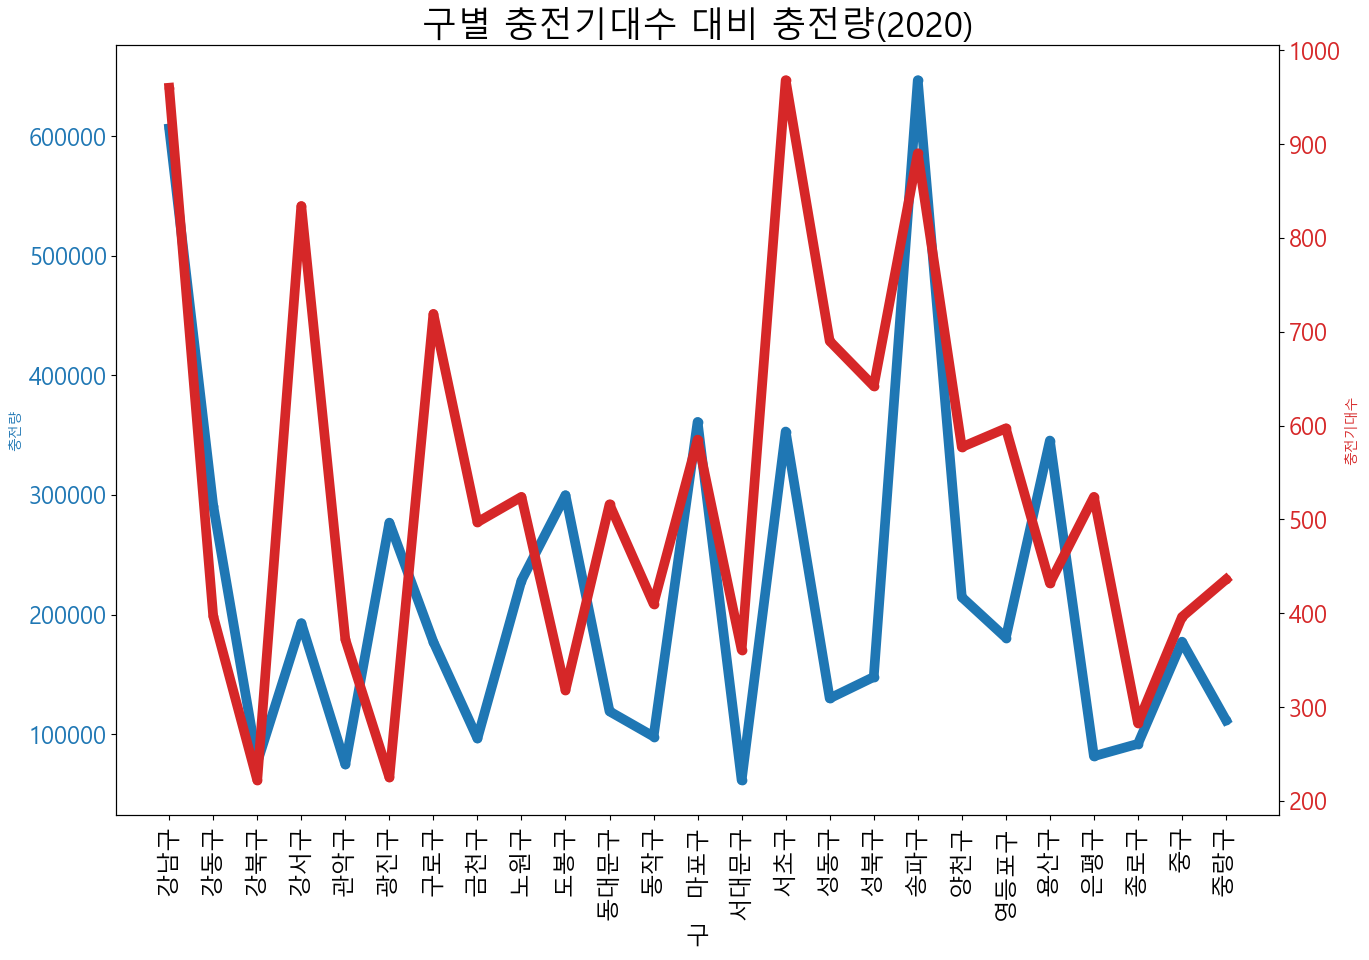

In [122]:
seoul_e=seoul_e.sort_index(ascending=True)
seoul_a=seoul_a.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:blue'
ax1.set_title('구별 충전기대수 대비 충전량(2020)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전량', fontsize=10, color=color_1)
ax1.plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('충전기대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_a['충전기대수'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

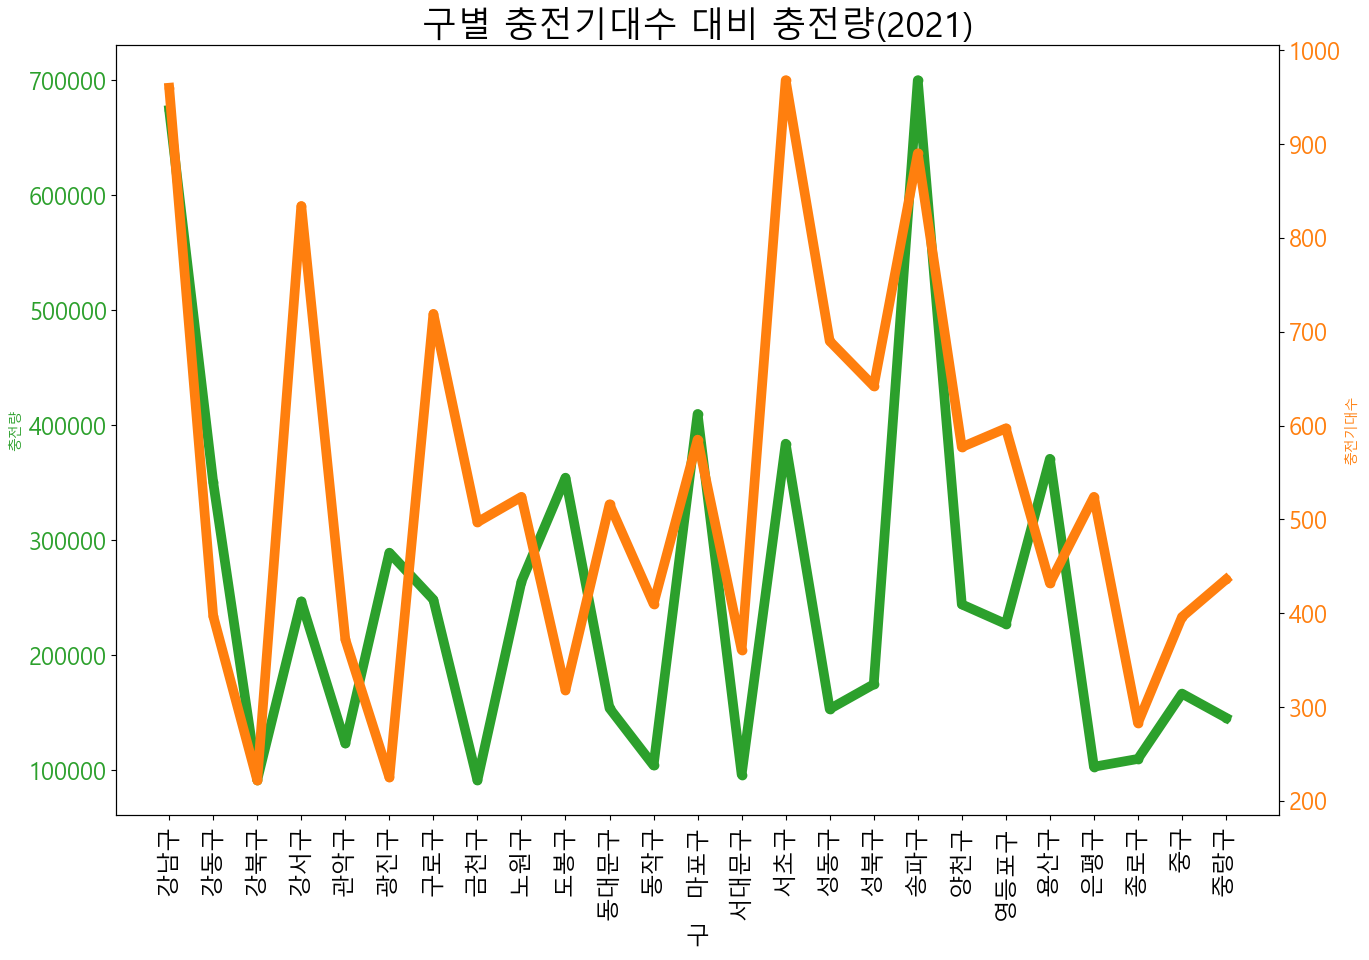

In [123]:
seoul_e=seoul_e.sort_index(ascending=True)
seoul_a=seoul_a.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:green'
ax1.set_title('구별 충전기대수 대비 충전량(2021)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전량', fontsize=10, color=color_1)
ax1.plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('충전기대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_a['충전기대수'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

### 인구수 대비 충전량

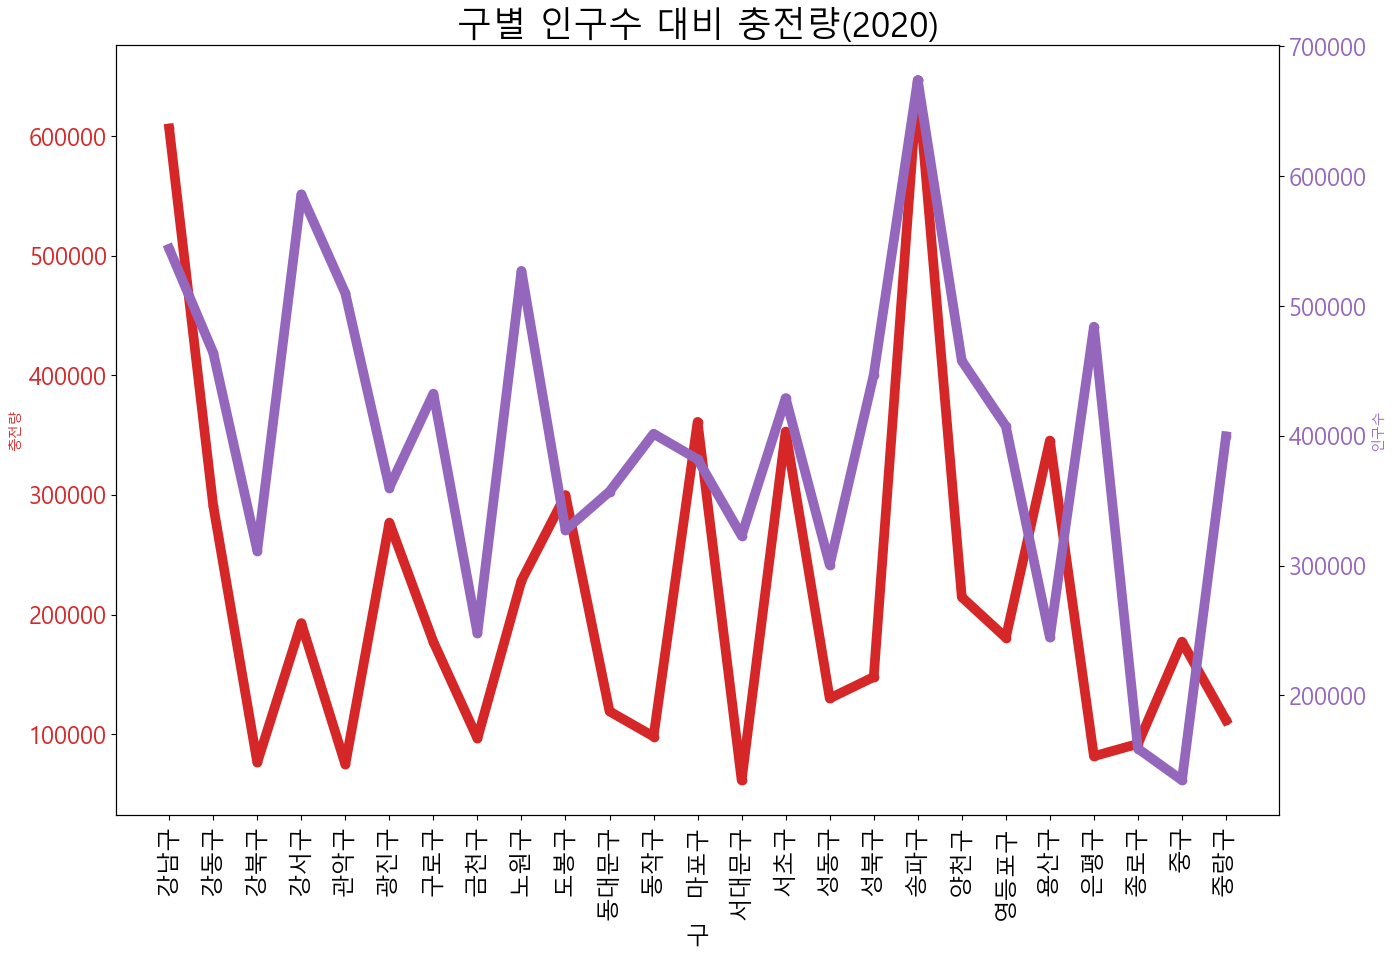

In [124]:
seoul_p=seoul_p.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:red'
ax1.set_title('구별 인구수 대비 충전량(2020)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전량', fontsize=10, color=color_1)
ax1.plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:purple'
ax2.set_ylabel('인구수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_p['인구수20'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

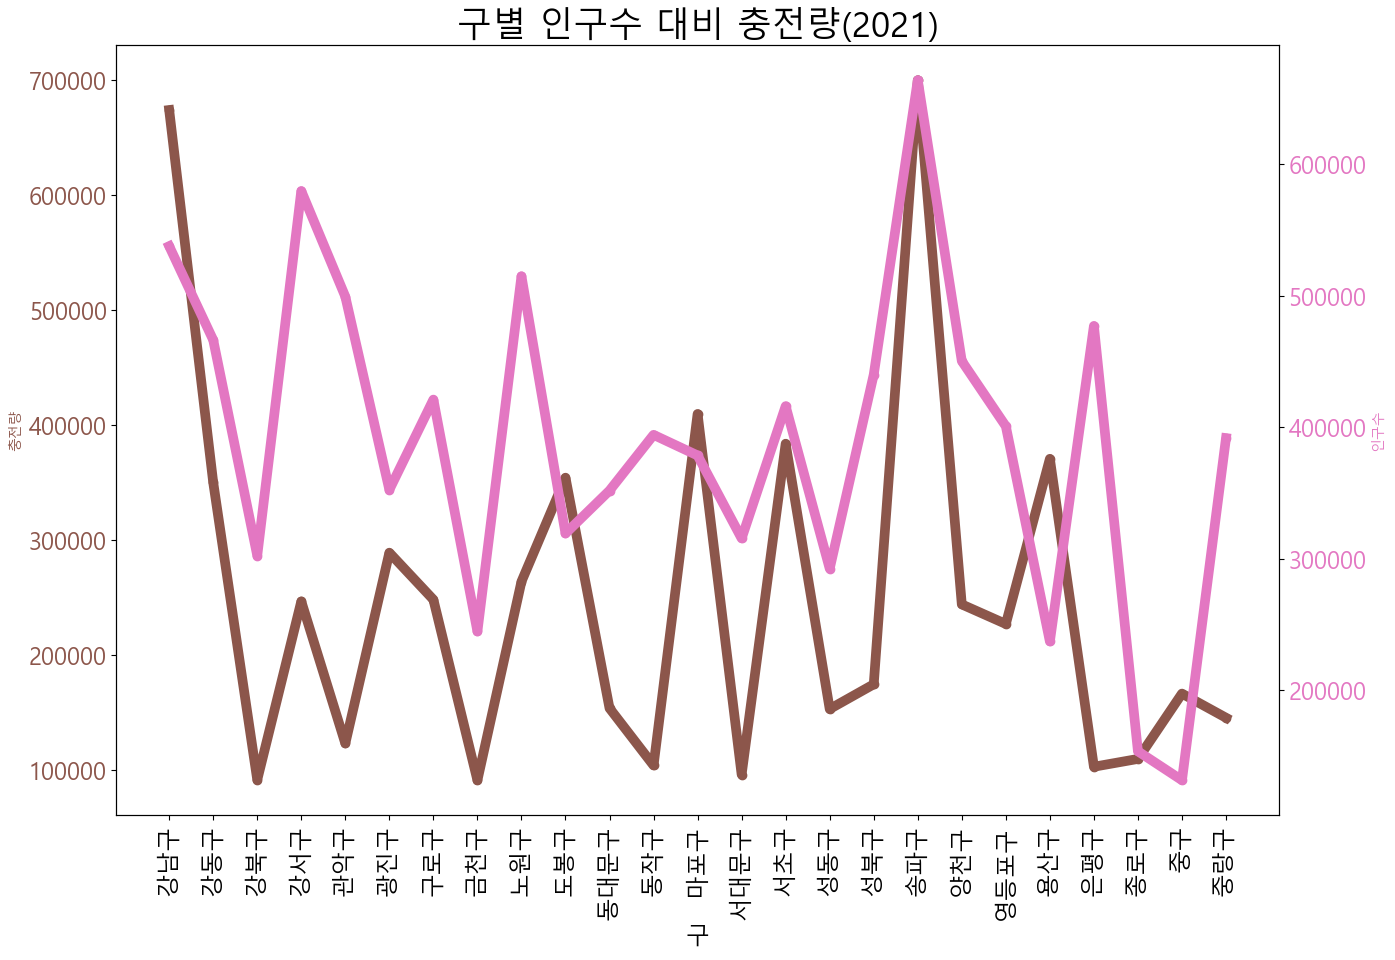

In [125]:
seoul_p=seoul_p.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:brown'
ax1.set_title('구별 인구수 대비 충전량(2021)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전량', fontsize=10, color=color_1)
ax1.plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('인구수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_p['인구수21'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

### 전기차대수 대비 충전량

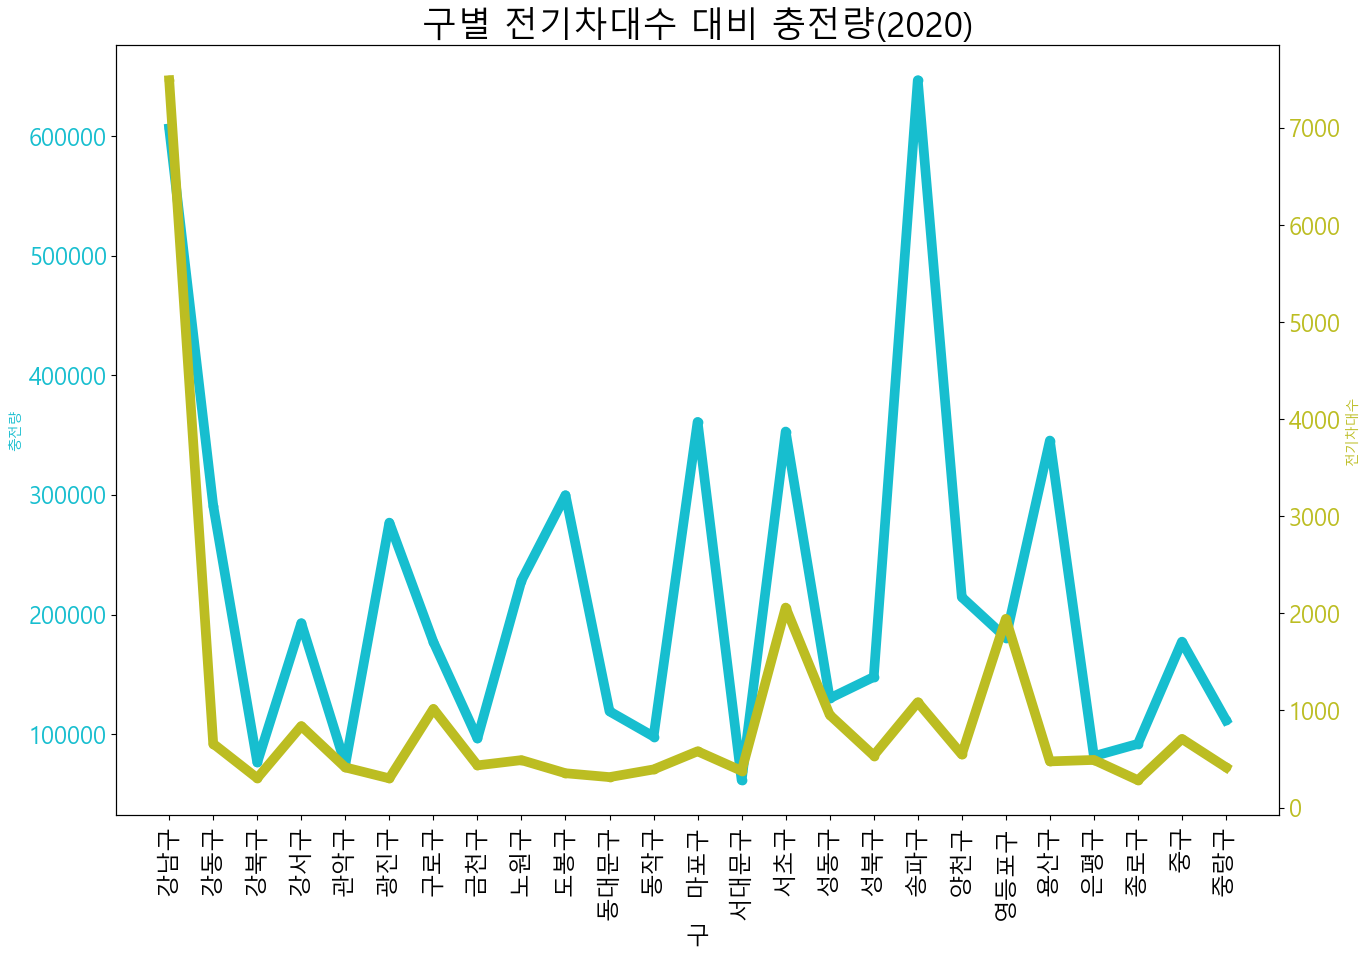

In [126]:
seoul_e=seoul_e.sort_index(ascending=True)
seoul_c=seoul_c.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:cyan'
ax1.set_title('구별 전기차대수 대비 충전량(2020)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전량', fontsize=10, color=color_1)
ax1.plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:olive'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_c['전기차대수20'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

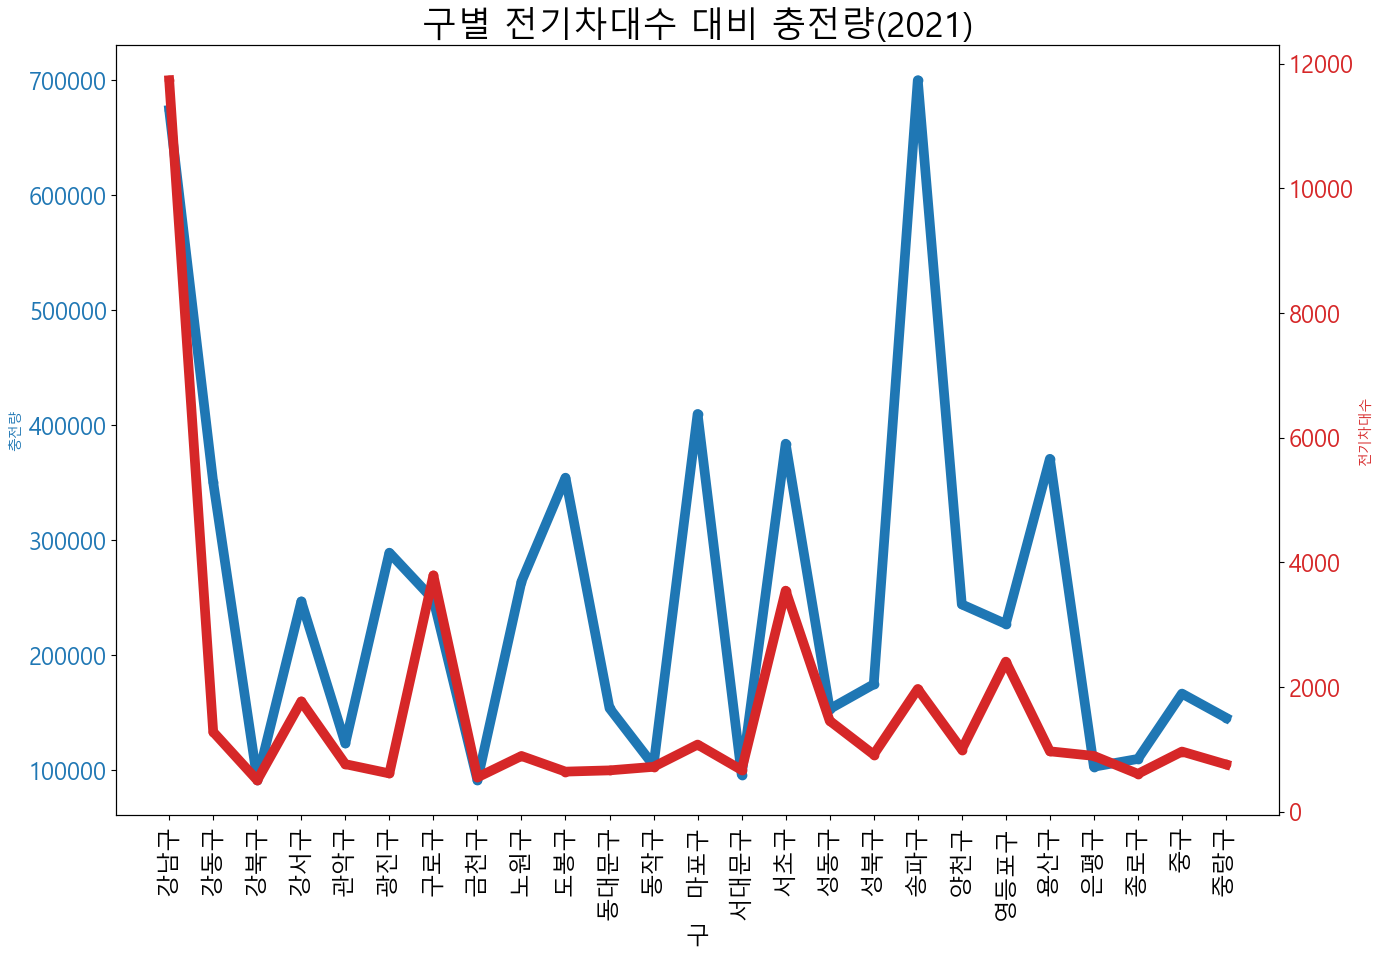

In [127]:
seoul_e=seoul_e.sort_index(ascending=True)
seoul_c=seoul_c.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:blue'
ax1.set_title('구별 전기차대수 대비 충전량(2021)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전량', fontsize=10, color=color_1)
ax1.plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_c['전기차대수21'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

### 충전기 종류 대비 충전량

In [128]:
energy=pd.read_csv("한국전력공사_전기차충전소충전량(202001_202006).csv",encoding="cp949")
energy2=pd.read_csv("한국전력공사_전기차충전소충전량(202007_202012).csv",encoding="cp949")
energy3=pd.read_csv("한국전력공사_전기차충전소충전량(202101_202106).csv",encoding="cp949")
energy4=pd.read_csv("한국전력공사_전기차충전소충전량(202107_202112).csv",encoding="cp949")

In [129]:
energy['지역']=energy['주소'].str.split(" ").str.get(0)
energy2['지역']=energy2['주소'].str.split(" ").str.get(0)
energy3['지역']=energy3['주소'].str.split(" ").str.get(0)
energy4['지역']=energy4['주소'].str.split(" ").str.get(0)
energy=energy[['지역','충전기구분','충전량']]
energy2=energy2[['지역','충전기구분','충전량']]
energy3=energy3[['지역','충전기구분','충전량']]
energy4=energy4[['지역','충전기구분','충전량']]


In [130]:
seoul1 = energy[energy['지역']=='서울특별시']
seoul2 = energy2[energy2['지역']=='서울특별시']
seoul3 = energy3[energy3['지역']=='서울특별시']
seoul4 = energy4[energy4['지역']=='서울특별시']
seoul_2020 = pd.concat([seoul1,seoul2])
seoul_2021 = pd.concat([seoul3,seoul4])
seoul_2020.reset_index(drop=True,inplace=True)
seoul_2021.reset_index(drop=True,inplace=True)
seoul_2020.drop(columns='지역',inplace=True)
seoul_2021.drop(columns='지역',inplace=True)
seoul_2020=seoul_2020.groupby(['충전기구분'])['충전량'].sum().reset_index()
seoul_2021=seoul_2021.groupby(['충전기구분'])['충전량'].sum().reset_index()
seoul_2020['충전량']=seoul_2020['충전량'].astype(int)
seoul_2021['충전량']=seoul_2021['충전량'].astype(int)


In [131]:
seoul_2020=seoul_2020.rename(columns={'충전량':'충전량20'})
seoul_2021=seoul_2021.rename(columns={'충전량':'충전량21'})
seoul_2020=seoul_2020.set_index('충전기구분')
seoul_2021=seoul_2021.set_index('충전기구분')

In [132]:
seoul_t=pd.concat([seoul_2020,seoul_2021],axis=1,join='inner')


In [133]:
seoul_t

충전량20    충전량21
충전기구분                  
급속     3255644  3520994
완속     2197888  2781596

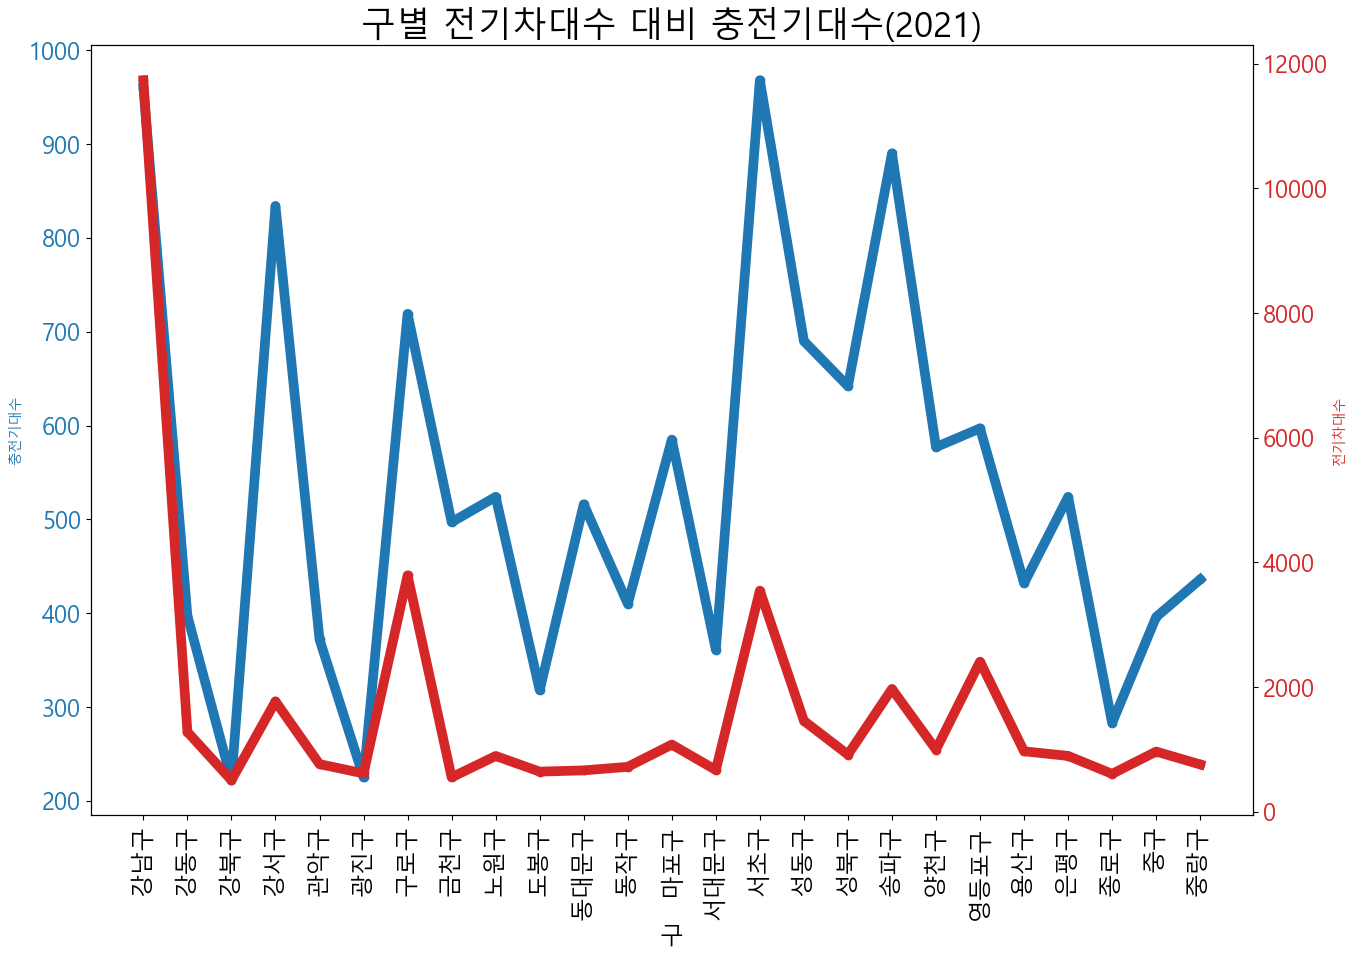

In [134]:
seoul_a=seoul_a.sort_index(ascending=True)
seoul_c=seoul_c.sort_index(ascending=True)
fig = plt.figure(figsize=(15,10)) 
ax1 = fig.add_subplot()
color_1 = 'tab:blue'
ax1.set_title('구별 전기차대수 대비 충전기대수(2021)', fontsize=25)
ax1.set_xlabel('구')
ax1.set_ylabel('충전기대수', fontsize=10, color=color_1)
ax1.plot(seoul_a.index, seoul_a.충전기대수, marker='o', color=color_1,linewidth=7)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_a.index, seoul_c['전기차대수21'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.show()

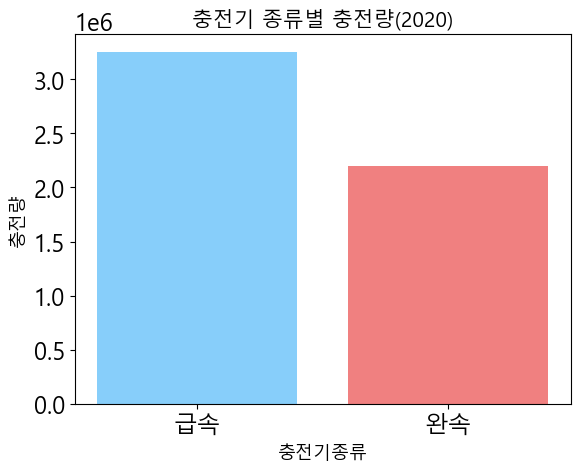

In [135]:
colors = ['lightskyblue', 'lightcoral']
x=seoul_t.index
y=seoul_t['충전량20']
plt.bar(x,y,color=colors)
plt.title('충전기 종류별 충전량(2020)',fontsize=15)
plt.xlabel('충전기종류',fontsize=13)
plt.ylabel('충전량',fontsize=13)
plt.show()

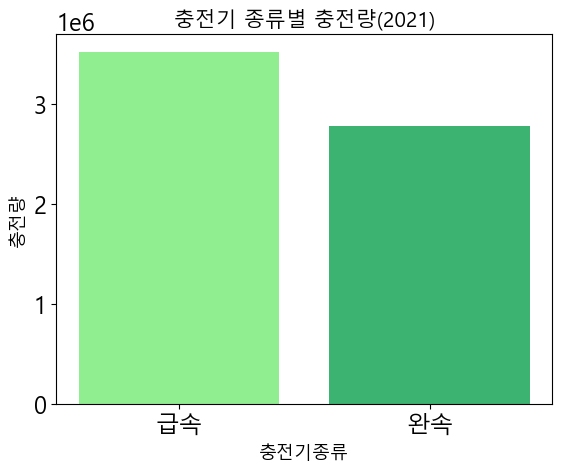

In [136]:
colors = ["lightgreen", "mediumseagreen"]
x=seoul_t.index
y=seoul_t['충전량21']
plt.bar(x,y,color=colors)
plt.title('충전기 종류별 충전량(2021)',fontsize=15)
plt.xlabel('충전기종류',fontsize=13)
plt.ylabel('충전량',fontsize=13)
plt.show()

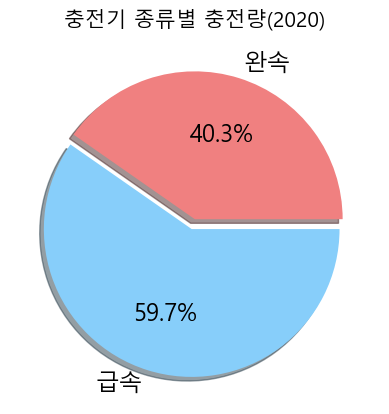

In [137]:
ratio = [3255644, 2197888]
labels = ['급속','완속']
colors = ['lightskyblue', 'lightcoral']
explode=[0.07,0]
plt.title('충전기 종류별 충전량(2020)',fontsize=15)

plt.pie(ratio, labels=labels, autopct='%.1f%%', counterclock=False, shadow=True,explode=explode,colors=colors)
plt.show()

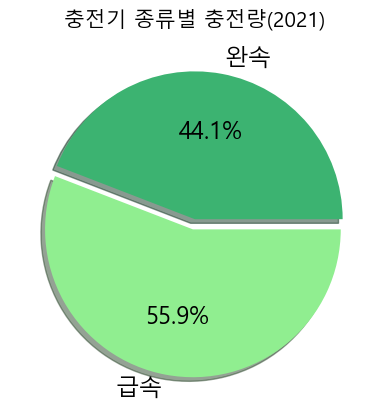

In [138]:
ratio = [3520994, 2781596]
labels = ['급속','완속']
colors = ["lightgreen", "mediumseagreen"]
explode=[0.07,0]
plt.title('충전기 종류별 충전량(2021)',fontsize=15)

plt.pie(ratio, labels=labels, autopct='%.1f%%', counterclock=False, shadow=True,explode=explode,colors=colors)
plt.show()

In [139]:
# se=pd.read_excel('서울전기차충전소.xlsx')

In [140]:
# se['구']=se['addr'].str.split(' ').str.get(1)
# se1 = se.groupby('구').count()
# se2 = se1.iloc[:,0].reset_index()
# se2 = se2.rename(columns={'구':'구별','Unnamed: 0':'충전기대수'})
# se2 = se2.set_index('구별')

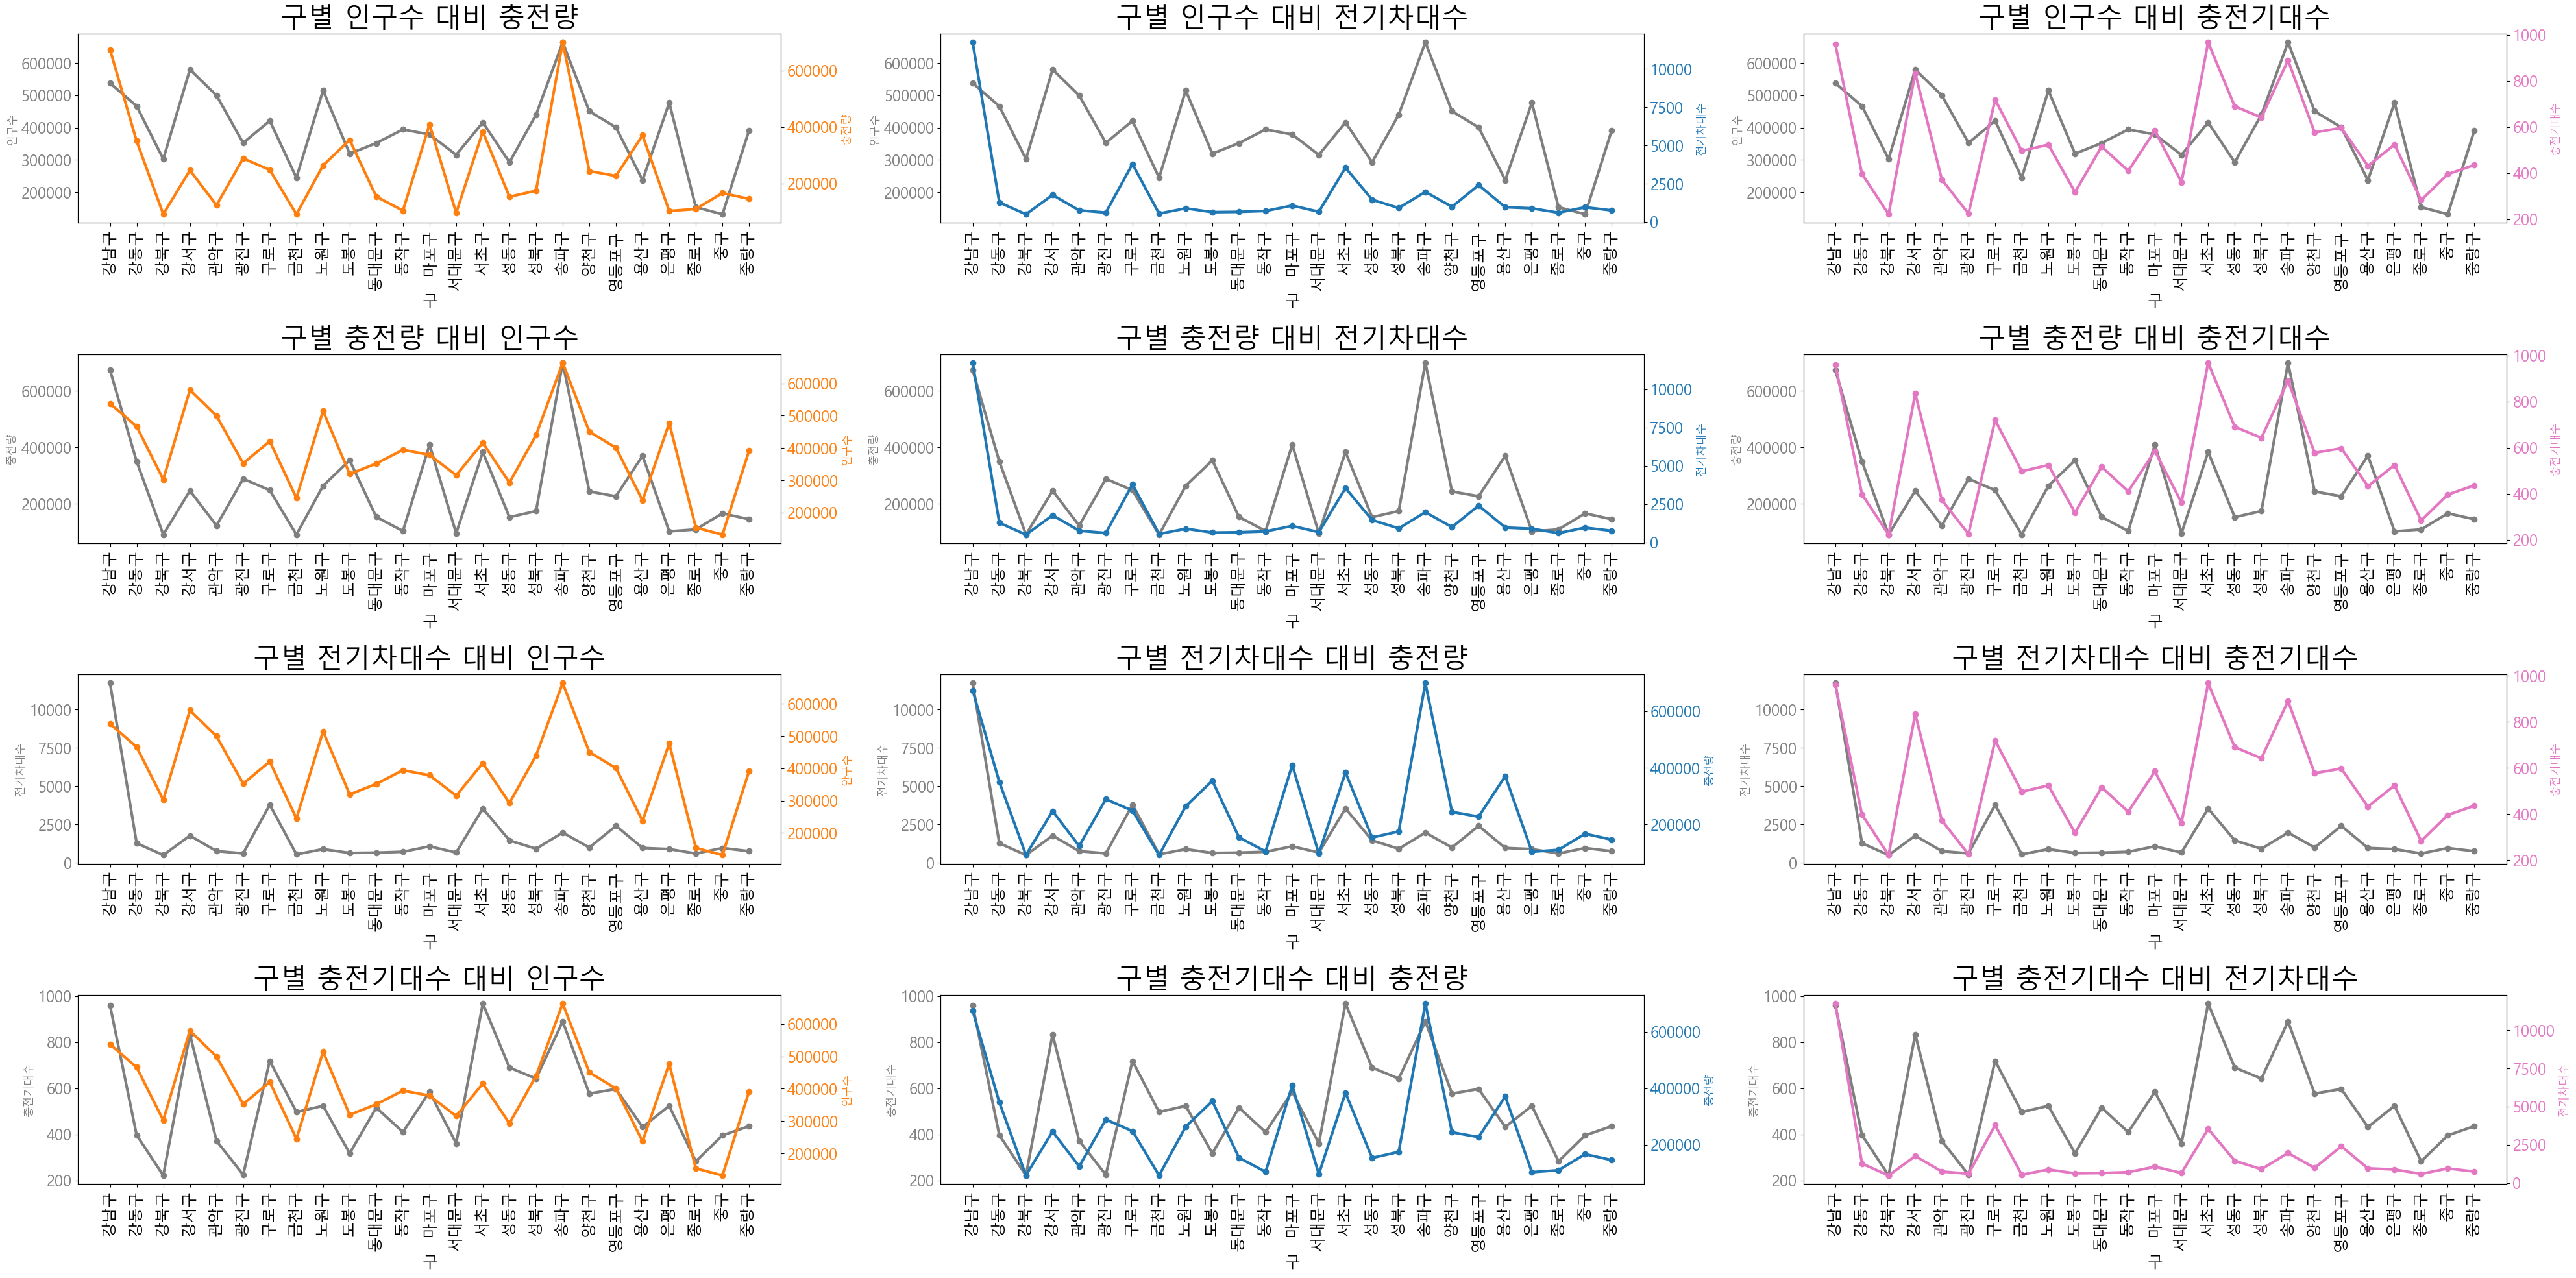

In [181]:
fig, ax1 = plt.subplots(figsize=(40,20),nrows=4,ncols=3)

# 1행 1열 -
color_1 = 'tab:gray'
ax1[0,0].set_title('구별 인구수 대비 충전량', fontsize=30)
ax1[0,0].set_xlabel('구')
ax1[0,0].set_ylabel('인구수', fontsize=12, color=color_1)
ax1[0,0].plot(seoul_p.index, seoul_p.인구수21, marker='o', color=color_1,linewidth=3)
ax1[0,0].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)
ax1[0,0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('충전량', fontsize=12, color=color_2)
ax2.plot(seoul_p.index, seoul_e.충전량21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 1행 2열 - 
color_1 = 'tab:gray'
ax1[0,1].set_title('구별 인구수 대비 전기차대수', fontsize=30)
ax1[0,1].set_xlabel('구')
ax1[0,1].set_ylabel('인구수', fontsize=12, color=color_1)
ax1[0,1].plot(seoul_p.index, seoul_p.인구수21, marker='o', color=color_1,linewidth=3)
ax1[0,1].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)
ax1[0,1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:blue'
ax2.set_ylabel('전기차대수', fontsize=12, color=color_2)
ax2.plot(seoul_p.index, seoul_c.전기차대수21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)


# 1행 3열 - 
color_1 = 'tab:gray'
ax1[0,2].set_title('구별 인구수 대비 충전기대수', fontsize=30)
ax1[0,2].set_xlabel('구')
ax1[0,2].set_ylabel('인구수', fontsize=12, color=color_1)
ax1[0,2].plot(seoul_p.index, seoul_p.인구수21, marker='o', color=color_1,linewidth=3)
ax1[0,2].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)
ax1[0,2].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0,2].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('충전기대수', fontsize=12, color=color_2)
ax2.plot(seoul_p.index, seoul_a.충전기대수, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)


# 2행 1열 - 
color_1 = 'tab:gray'
ax1[1,0].set_title('구별 충전량 대비 인구수', fontsize=30)
ax1[1,0].set_xlabel('구')
ax1[1,0].set_ylabel('충전량', fontsize=12, color=color_1)
ax1[1,0].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=3)
ax1[1,0].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)
ax1[1,0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('인구수', fontsize=12, color=color_2)
ax2.plot(seoul_e.index, seoul_p.인구수21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 2행 2열 -
color_1 = 'tab:gray'
ax1[1,1].set_title('구별 충전량 대비 전기차대수', fontsize=30)
ax1[1,1].set_xlabel('구')
ax1[1,1].set_ylabel('충전량', fontsize=12, color=color_1)
ax1[1,1].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=3)
ax1[1,1].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)
ax1[1,1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:blue'
ax2.set_ylabel('전기차대수', fontsize=12, color=color_2)
ax2.plot(seoul_e.index, seoul_c.전기차대수21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 2행 3열 - 
color_1 = 'tab:gray'
ax1[1,2].set_title('구별 충전량 대비 충전기대수', fontsize=30)
ax1[1,2].set_xlabel('구')
ax1[1,2].set_ylabel('충전량', fontsize=12, color=color_1)
ax1[1,2].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=3)
ax1[1,2].tick_params(axis='y', labelcolor=color_1)
ax1[1,2].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)


# right side with different scale
ax2 = ax1[1,2].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('충전기대수', fontsize=12, color=color_2)
ax2.plot(seoul_e.index, seoul_a.충전기대수, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)



# 3행 1열 - 
color_1 = 'tab:gray'
ax1[2,0].set_title('구별 전기차대수 대비 인구수', fontsize=30)
ax1[2,0].set_xlabel('구')
ax1[2,0].set_ylabel('전기차대수', fontsize=12, color=color_1)
ax1[2,0].plot(seoul_c.index, seoul_c.전기차대수21, marker='o', color=color_1,linewidth=3)
ax1[2,0].tick_params(axis='y', labelcolor=color_1)
ax1[2,0].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)


# right side with different scale
ax2 = ax1[2,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('안구수', fontsize=12, color=color_2)
ax2.plot(seoul_c.index, seoul_p.인구수21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 3행 2열 - 2020 운량별 발전량
color_1 = 'tab:gray'
ax1[2,1].set_title('구별 전기차대수 대비 충전량', fontsize=30)
ax1[2,1].set_xlabel('구')
ax1[2,1].set_ylabel('전기차대수', fontsize=12, color=color_1)
ax1[2,1].plot(seoul_c.index, seoul_c.전기차대수21, marker='o', color=color_1,linewidth=3)
ax1[2,1].tick_params(axis='y', labelcolor=color_1)
ax1[2,1].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)


# right side with different scale
ax2 = ax1[2,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:blue'
ax2.set_ylabel('충전량', fontsize=12, color=color_2)
ax2.plot(seoul_c.index, seoul_e.충전량21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 3행 3열 - 
color_1 = 'tab:gray'
ax1[2,2].set_title('구별 전기차대수 대비 충전기대수', fontsize=30)
ax1[2,2].set_xlabel('구')
ax1[2,2].set_ylabel('전기차대수', fontsize=12, color=color_1)
ax1[2,2].plot(seoul_c.index, seoul_c.전기차대수21, marker='o', color=color_1,linewidth=3)
ax1[2,2].tick_params(axis='y', labelcolor=color_1)
ax1[2,2].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)


# right side with different scale
ax2 = ax1[2,2].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('충전기대수', fontsize=12, color=color_2)
ax2.plot(seoul_c.index, seoul_a.충전기대수, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)



# 4행 1열 - 
color_1 = 'tab:gray'
ax1[3,0].set_title('구별 충전기대수 대비 인구수', fontsize=30)
ax1[3,0].set_xlabel('구')
ax1[3,0].set_ylabel('충전기대수', fontsize=12, color=color_1)
ax1[3,0].plot(seoul_a.index, seoul_a.충전기대수, marker='o', color=color_1,linewidth=3)
ax1[3,0].tick_params(axis='y', labelcolor=color_1)
ax1[3,0].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)


# right side with different scale
ax2 = ax1[3,0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('인구수', fontsize=12, color=color_2)
ax2.plot(seoul_a.index, seoul_p.인구수21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 4행 2열 - 
color_1 = 'tab:gray'
ax1[3,1].set_title('구별 충전기대수 대비 충전량', fontsize=30)
ax1[3,1].set_xlabel('구')
ax1[3,1].set_ylabel('충전기대수', fontsize=12, color=color_1)
ax1[3,1].plot(seoul_a.index, seoul_a.충전기대수, marker='o', color=color_1,linewidth=3)
ax1[3,1].tick_params(axis='y', labelcolor=color_1)
ax1[3,1].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)

# right side with different scale
ax2 = ax1[3,1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:blue'
ax2.set_ylabel('충전량', fontsize=12, color=color_2)
ax2.plot(seoul_a.index, seoul_e.충전량21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

# 4행 3열 - 
color_1 = 'tab:gray'
ax1[3,2].set_title('구별 충전기대수 대비 전기차대수', fontsize=30)
ax1[3,2].set_xlabel('구')
ax1[3,2].set_ylabel('충전기대수', fontsize=12, color=color_1)
ax1[3,2].plot(seoul_a.index, seoul_a.충전기대수, marker='o', color=color_1,linewidth=3)
ax1[3,2].tick_params(axis='y', labelcolor=color_1)
ax1[3,2].set_xticklabels(ax1[0,0].get_xticklabels(),rotation=90)


# right side with different scale
ax2 = ax1[3,2].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('전기차대수', fontsize=12, color=color_2)
ax2.plot(seoul_a.index, seoul_c.전기차대수21, marker='o', color=color_2,linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()